In [6]:
import polars as pl
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"  # MUST BE BEFORE torch import

import torch

path = "/home/astrodados4/downloads/hypercube/datacube_SPLUS-n03s08.parquet"

In [7]:
df = pl.read_parquet(path)

In [9]:
list(df.columns)

['id',
 'random_idx',
 'ra',
 'dec',
 'field',
 'a_pixel_det',
 'a_restricted_pixel_r',
 'b_pixel_det',
 'b_restricted_pixel_r',
 'class_star_det',
 'class_star_g',
 'class_star_i',
 'class_star_j0378',
 'class_star_j0395',
 'class_star_j0410',
 'class_star_j0430',
 'class_star_j0515',
 'class_star_j0660',
 'class_star_j0861',
 'class_star_r',
 'class_star_u',
 'class_star_z',
 'ellipticity_det',
 'elongation_det',
 'err_a_pixel_det',
 'err_b_pixel_det',
 'err_mag_aper_3_g',
 'err_mag_aper_3_i',
 'err_mag_aper_3_j0378',
 'err_mag_aper_3_j0395',
 'err_mag_aper_3_j0410',
 'err_mag_aper_3_j0430',
 'err_mag_aper_3_j0515',
 'err_mag_aper_3_j0660',
 'err_mag_aper_3_j0861',
 'err_mag_aper_3_r',
 'err_mag_aper_3_u',
 'err_mag_aper_3_z',
 'err_mag_aper_6_g',
 'err_mag_aper_6_i',
 'err_mag_aper_6_j0378',
 'err_mag_aper_6_j0395',
 'err_mag_aper_6_j0410',
 'err_mag_aper_6_j0430',
 'err_mag_aper_6_j0515',
 'err_mag_aper_6_j0660',
 'err_mag_aper_6_j0861',
 'err_mag_aper_6_r',
 'err_mag_aper_6_u',
 '

In [6]:
df = df.filter(pl.col("splus_cut_F378").is_not_null())

In [7]:
bands = [
    'F378', 'F395', 'F410', 'F430', 'F515', 'F660', 'F861',
    'U', 'G', 'R', 'I', 'Z'
]

In [8]:
df

id,random_idx,ra,dec,field,a_pixel_det,a_restricted_pixel_r,b_pixel_det,b_restricted_pixel_r,class_star_det,class_star_g,class_star_i,class_star_j0378,class_star_j0395,class_star_j0410,class_star_j0430,class_star_j0515,class_star_j0660,class_star_j0861,class_star_r,class_star_u,class_star_z,ellipticity_det,elongation_det,err_a_pixel_det,err_b_pixel_det,err_mag_aper_3_g,err_mag_aper_3_i,err_mag_aper_3_j0378,err_mag_aper_3_j0395,err_mag_aper_3_j0410,err_mag_aper_3_j0430,err_mag_aper_3_j0515,err_mag_aper_3_j0660,err_mag_aper_3_j0861,err_mag_aper_3_r,err_mag_aper_3_u,…,specz_e_z,specz_f_z,specz_original_f_z,specz_class_spec,specz_subclass,specz_subsubclass,specz_original_class_spec,specz_source,vista_sourceid,vista_ra2000,vista_dec2000,vista_yapermag3,vista_yapermag3err,vista_yapermag4,vista_yapermag4err,vista_yapermag6,vista_yapermag6err,vista_japermag3,vista_japermag3err,vista_japermag4,vista_japermag4err,vista_japermag6,vista_japermag6err,vista_hapermag3,vista_hapermag3err,vista_hapermag4,vista_hapermag4err,vista_hapermag6,vista_hapermag6err,vista_ksapermag3,vista_ksapermag3err,vista_ksapermag4,vista_ksapermag4err,vista_ksapermag6,vista_ksapermag6err,vista_ra,vista_dec
binary,i64,f64,f64,binary,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,…,f64,f64,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"b""i06H001100003""",119809653,149.954748,-24.593265,"b""HYDRA-0011""",1.137278,1.136658,1.000288,0.999773,0.053547,0.347015,0.23164,0.346764,0.346825,0.346686,0.346923,0.346746,0.652347,0.033816,0.038165,0.347263,0.076908,0.120454,1.13695,0.075282,0.065302,13.837123,0.072525,null,null,null,null,null,0.160009,0.163193,0.166264,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"b""i06H00110000M""",20346042,150.194979,-24.592109,"b""HYDRA-0011""",1.334609,1.348997,1.186396,1.185248,0.901893,0.125559,0.507066,0.071045,0.007799,0.004378,0.07621,0.000716,0.617737,0.451103,0.944547,0.016491,0.429608,0.111054,1.124927,0.031828,0.028065,0.035678,0.030784,0.184381,0.18341,0.268294,0.178868,0.084596,0.044908,0.100811,0.02551,0.124493,…,null,null,null,null,null,null,null,null,4.7285e11,150.194979,-24.592091,null,null,null,null,null,null,18.322908,0.07065,18.338017,0.084422,18.245247,0.129696,null,null,null,null,null,null,17.914845,0.199935,17.828348,0.231499,17.658508,0.360197,150.194979,-24.592091
"b""i06H00110000N""",70810543,149.930702,-24.590851,"b""HYDRA-0011""",1.405123,1.401706,1.319195,1.301826,0.978319,0.156008,0.835746,0.354472,0.351432,0.366036,0.505135,0.621374,0.867319,0.730709,0.975974,0.347755,0.962459,0.061154,1.065137,0.019986,0.018315,0.053581,0.027532,null,268.45517,0.459117,0.295921,0.146753,0.03135,0.056142,0.028077,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"b""i06H00110000P""",5889210,150.180793,-24.591861,"b""HYDRA-0011""",1.281376,1.281439,1.172136,1.172207,0.885173,0.43096,0.934606,0.346895,0.34676,0.347312,0.346721,0.378662,0.814215,0.069583,0.828242,0.34663,0.722382,0.085252,1.093197,0.026135,0.024956,0.122682,0.018129,null,null,null,null,1.018859,0.049228,0.03484,0.038987,null,…,null,null,null,null,null,null,null,null,4.7285e11,150.180787,-24.591853,null,null,null,null,null,null,16.3557,0.012368,16.371902,0.014401,16.376556,0.023505,null,null,null,null,null,null,15.538778,0.023208,15.550307,0.028963,15.506456,0.049904,150.180787,-24.591853
"b""i06H00110000Z""",51912355,150.480332,-24.590446,"b""HYDRA-0011""",1.11822,1.119092,0.999068,0.999905,0.732867,0.351525,0.097259,0.346789,0.346198,0.3474,0.347094,0.348206,0.604913,0.064591,0.81763,0.346577,0.058517,0.10655

In [9]:
import math
import polars as pl
import torch

# adapt U/G/R/I/Z if your real columns are lowercase
BANDS = [
    "F378", "F395", "F410", "F430",
    "F515", "F660", "F861",
    "U", "G", "R", "I", "Z",
]


# 🔹 Convert flattened arrays into square images
def _to_image_torch(flat) -> torch.Tensor:
    arr = torch.as_tensor(flat, dtype=torch.float32)

    if arr.ndim == 2:
        return arr

    if arr.ndim == 1:
        n = arr.numel()
        side = int(math.isqrt(n))
        if side * side != n:
            raise ValueError(f"Cannot reshape length {n} into a square image")
        return arr.view(side, side)

    raise ValueError(f"Unexpected ndim={arr.ndim} for image data")


# 🔹 Elliptical footprint from SExtractor parameters
def elliptical_mask(H, W, x0, y0, a, b, theta, device="cpu", expand_factor=4.0):
    """
    Binary mask: 1 inside expanded ellipse, 0 outside.
    """
    yy, xx = torch.meshgrid(
        torch.arange(H, device=device),
        torch.arange(W, device=device),
        indexing="ij"
    )

    yy = yy.float()
    xx = xx.float()

    a_scaled = a * expand_factor
    b_scaled = b * expand_factor

    X = xx - x0
    Y = yy - y0

    ct = torch.cos(theta)
    st = torch.sin(theta)

    Xp =  X * ct + Y * st
    Yp = -X * st + Y * ct

    mask = (Xp / a_scaled) ** 2 + (Yp / b_scaled) ** 2 <= 1.0
    return mask.float()


# 🔹 Detection-aware Sigma:
#     - noise from background
#     - weight by how much object stands above sky in that band
def compute_sigma_detection_aware(x: torch.Tensor,
                                  m_pix: torch.Tensor,
                                  eps: float = 1e-3) -> torch.Tensor:
    """
    x    : (C, H, W) flux
    m_pix: (C, H, W) mask of valid object pixels (0/1)

    For each band c:
      - estimate sky sigma from pixels OUTSIDE mask
      - estimate object median from INSIDE mask
      - compute band SNR = (med_in - med_bg) / sigma_bg
      - weight in [0,1]: w = snr / (snr + 1)
      - Sigma_inside = w * 1 / sigma_bg^2 ; Sigma_outside = 0
    """
    device = x.device
    C, H, W = x.shape
    Sigma = torch.zeros_like(x, device=device)

    for c in range(C):
        mask_in = m_pix[c] > 0.5
        mask_out = ~mask_in

        # background pixels
        bg_vals = x[c][mask_out]
        if bg_vals.numel() < 10:
            # fallback: use all non-NaN pixels as "background"
            bg_vals = x[c][torch.isfinite(x[c])]

        if bg_vals.numel() == 0:
            continue

        med_bg = bg_vals.median()
        mad_bg = (bg_vals - med_bg).abs().median()

        # convert MAD -> "sigma" (optional factor ~1.48 if you want Gaussian eq.)
        sigma_bg = mad_bg + eps

        # object pixels
        obj_vals = x[c][mask_in]
        if obj_vals.numel() == 0:
            continue

        med_in = obj_vals.median()

        # band-level SNR (how much object stands above sky)
        snr_band = (med_in - med_bg) / (sigma_bg + eps)

        # clamp: negative => 0 (object dimmer than sky)
        snr_band = torch.clamp(snr_band, min=0.0)

        # map to [0,1): 0 -> pure sky, ~1 -> strong detection
        weight = snr_band / (snr_band + 1.0 + eps)

        base_invvar = 1.0 / (sigma_bg ** 2 + eps)

        Sigma[c][mask_in] = weight * base_invvar

    return Sigma


# 🔹 Main function
def row_to_tensors_torch(df: pl.DataFrame, idx: int, device: str = "cpu"):
    """
    Returns:
      x      : (C, H, W) flux
      Sigma  : (C, H, W) detection-aware weight map
      m_pix  : (C, H, W) validity mask (0/1), including elliptical footprint
      m_band : (C,) per-band mask (0/1)
    """
    imgs = []
    masks_pix_binary = []

    # build images
    for band in BANDS:
        flat = df[f"splus_cut_{band}"][idx]
        img = _to_image_torch(flat)

        valid = torch.isfinite(img) & (img != 0.0)

        img_clean = img.clone()
        img_clean[~torch.isfinite(img_clean)] = 0.0

        imgs.append(img_clean)
        masks_pix_binary.append(valid.float())

    x = torch.stack(imgs, dim=0).to(device)         # (C, H, W)
    m_pix_basic = torch.stack(masks_pix_binary, dim=0).to(device)

    C, H, W = x.shape

    # Image center as object center (adapt if you have real X/Y columns)
    x0 = torch.tensor(48.0, device=device)
    y0 = torch.tensor(48.0, device=device)

    a  = torch.tensor(float(df["a_pixel_det"][idx]), device=device)
    b  = torch.tensor(float(df["b_pixel_det"][idx]), device=device)
    th = torch.tensor(float(df["theta_det"][idx]), device=device)

    theta = th * math.pi / 180.0

    obj_mask = elliptical_mask(
        H, W,
        x0=x0,
        y0=y0,
        a=a,
        b=b,
        theta=theta,
        device=device,
    )

    obj_mask_full = obj_mask.unsqueeze(0).expand(C, H, W)

    # refined pixel mask: finite pixels inside ellipse
    m_pix = m_pix_basic * obj_mask_full

    # per-band flag
    m_band = (m_pix.sum(dim=(1, 2)) > 0).float()

    # detection-aware Sigma
    Sigma = compute_sigma_detection_aware(x, m_pix)

    return x, Sigma, m_pix, m_band

In [20]:
idx = 10003
x, Sigma, m_pix, m_band = row_to_tensors_torch(df, idx, device="cuda" if torch.cuda.is_available() else "cpu")

print("x:", x.shape)
print("Sigma:", Sigma.shape)
print("m_pix:", m_pix.shape)
print("m_band:", m_band.shape)

x: torch.Size([12, 96, 96])
Sigma: torch.Size([12, 96, 96])
m_pix: torch.Size([12, 96, 96])
m_band: torch.Size([12])


In [13]:
import matplotlib.pyplot as plt
import numpy as np

def debug_plot_sample_torch(x, Sigma, m_pix, m_band, bands=BANDS, band_indices=(0, 1, 2, 3)):
    """
    x, Sigma, m_pix, m_band are torch tensors:
      x: (C, H, W)
      Sigma: (C, H, W)
      m_pix: (C, H, W)
      m_band: (C,)
    """
    # move to CPU & numpy
    x_np = x.detach().cpu().numpy()
    sigma_np = Sigma.detach().cpu().numpy()
    mpix_np = m_pix.detach().cpu().numpy()
    mband_np = m_band.detach().cpu().numpy()

    n_rows = len(band_indices)
    fig, axes = plt.subplots(n_rows, 4, figsize=(12, 3 * n_rows))

    if n_rows == 1:
        axes = np.expand_dims(axes, 0)

    for row_i, c in enumerate(band_indices):
        bname = bands[c]
        ax0, ax1, ax2, ax3 = axes[row_i]

        img_x = x_np[c]
        img_mpix = mpix_np[c]
        img_sigma = sigma_np[c]
        img_masked = img_x * img_sigma

        im0 = ax0.imshow(img_x, origin="lower")
        ax0.set_title(f"{bname} – flux")
        plt.colorbar(im0, ax=ax0, fraction=0.046, pad=0.04)

        im1 = ax1.imshow(img_mpix, origin="lower")
        ax1.set_title(f"{bname} – m_pix")
        plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)

        im2 = ax2.imshow(img_sigma, origin="lower")
        ax2.set_title(f"{bname} – Sigma")
        plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)

        im3 = ax3.imshow(img_masked, origin="lower")
        ax3.set_title(f"{bname} – flux * m_pix")
        plt.colorbar(im3, ax=ax3, fraction=0.046, pad=0.04)

    fig.suptitle(f"m_band = {mband_np}", y=0.98)
    plt.tight_layout()
    plt.show()

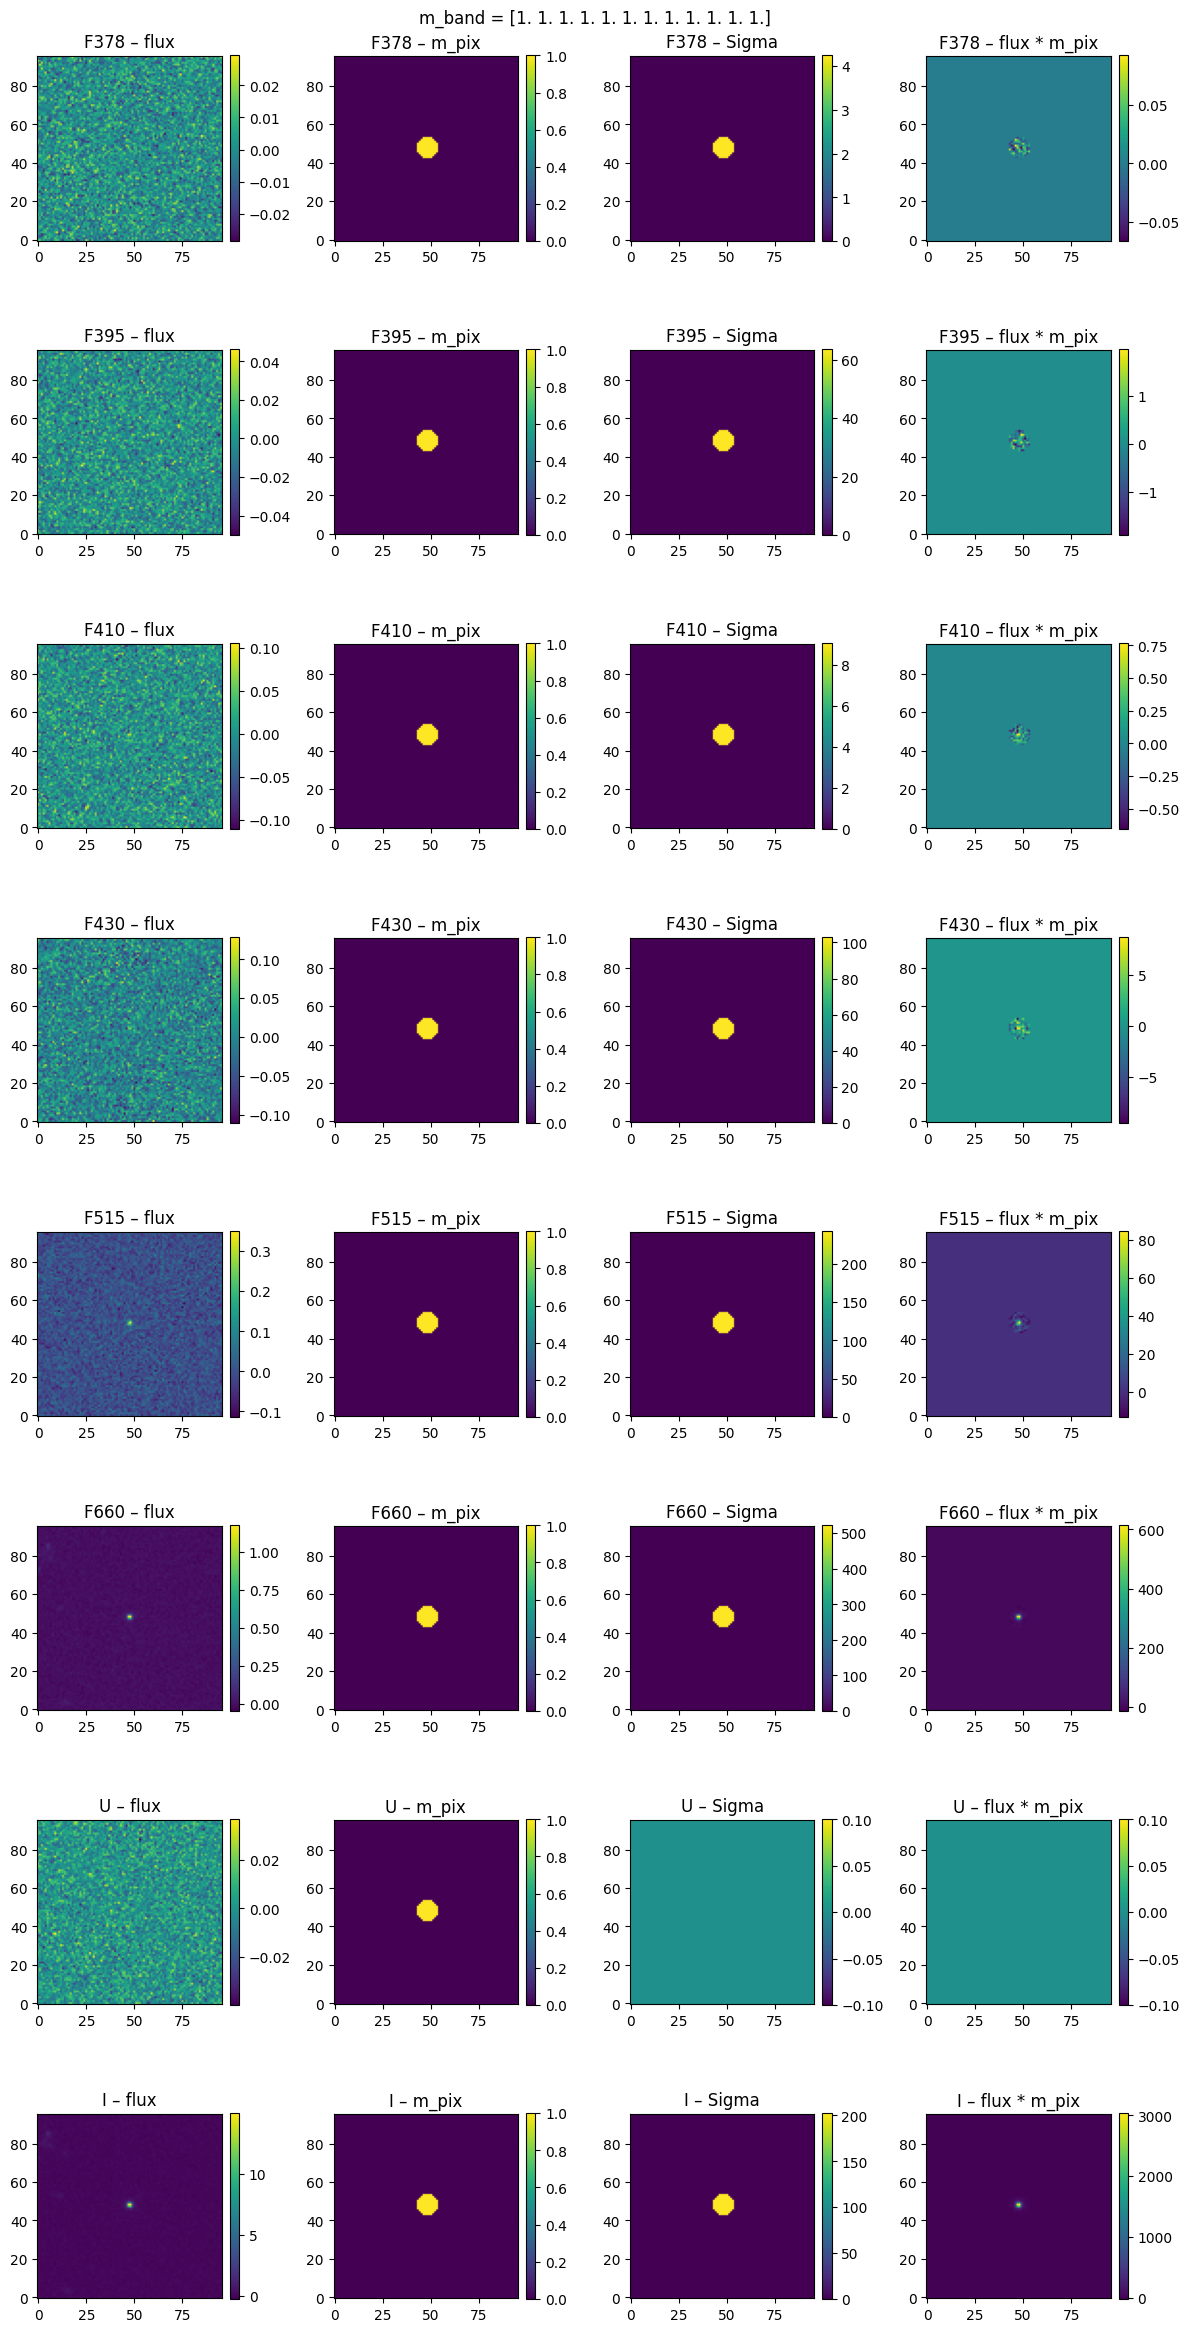

In [14]:
idx = 10005
x, Sigma, m_pix, m_band = row_to_tensors_torch(df, idx, device="cpu")
debug_plot_sample_torch(x, Sigma, m_pix, m_band, band_indices=(0,1,2,3, 4,5, 7, 10))

In [11]:
from torch.utils.data import Dataset, DataLoader

class SplusDataset(Dataset):
    def __init__(self, df: pl.DataFrame):
        self.df = df

    def __len__(self):
        return self.df.height

    def __getitem__(self, idx):
        # keep tensors on CPU here; move to GPU in training loop
        x, Sigma, m_pix, m_band = row_to_tensors_torch(self.df, idx, device="cpu")
        return x, Sigma, m_pix, m_band

In [12]:
import torch.nn as nn

class ConvAutoEncoder(nn.Module):
    def __init__(self, in_channels: int = 12, latent_dim: int = 256):
        super().__init__()

        # Encoder: 96→48→24→12
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # 96 -> 48

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # 48 -> 24

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # 24 -> 12
        )

        self.enc_flat_dim = 128 * 12 * 12

        self.fc_enc = nn.Linear(self.enc_flat_dim, latent_dim)
        self.fc_dec = nn.Linear(latent_dim, self.enc_flat_dim)

        # Decoder: 12→24→48→96
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2),  # 12 -> 24
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),   # 24 -> 48
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(32, in_channels, kernel_size=2, stride=2),  # 48 -> 96
            # no activation: we regress flux directly
        )

    def encode(self, x):
        h = self.encoder(x)
        h = h.view(x.size(0), -1)
        z = self.fc_enc(h)
        return z

    def decode(self, z):
        h = self.fc_dec(z)
        h = h.view(z.size(0), 128, 12, 12)
        x_hat = self.decoder(h)
        return x_hat

    def forward(self, x):
        z = self.encode(x)
        x_hat = self.decode(z)
        return x_hat, z

In [13]:
def reconstruction_loss(x, x_hat, m_pix, Sigma=None, eps=1e-6):
    """
    x, x_hat, m_pix, Sigma: (B, C, H, W)
    - m_pix: 0/1 (or 0..1) pixel validity mask
    - Sigma: optional per-pixel inverse variance (0 outside object)
    """
    diff2 = (x_hat - x) ** 2

    if Sigma is not None:
        weights = Sigma * m_pix    # only where both Sigma>0 and valid
    else:
        weights = m_pix

    num = (weights * diff2).sum()
    den = weights.sum() + eps

    return num / den

In [14]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("device:", device)

dataset = SplusDataset(df)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

model = ConvAutoEncoder(in_channels=len(BANDS), latent_dim=256).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

use_sigma_in_loss = True  # flip to False if you want only m_pix

for epoch in range(10):  # adjust
    model.train()
    running_loss = 0.0

    for x, Sigma, m_pix, m_band in loader:
        x = x.to(device)           # (B,C,H,W)
        Sigma = Sigma.to(device)
        m_pix = m_pix.to(device)

        # Optionally mask input too, so encoder sees only object pixels
        x_in = x * m_pix

        optimizer.zero_grad()
        x_hat, z = model(x_in)

        loss = reconstruction_loss(
            x=x,
            x_hat=x_hat,
            m_pix=m_pix,
            Sigma=Sigma if use_sigma_in_loss else None,
        )

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * x.size(0)

    epoch_loss = running_loss / len(dataset)
    print(f"Epoch {epoch+1}: loss={epoch_loss:.4e}")

device: cuda


Epoch 1: loss=7.9031e+01
Epoch 2: loss=5.2277e+01


KeyboardInterrupt: 

In [ ]:
#!/usr/bin/env python
import os
# 🔹 MUST be before importing torch
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

import math
from pathlib import Path
from typing import List, Sequence, Iterable

import polars as pl
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm

# =========================
# CONFIG
# =========================

# List of parquet files to train on
PARQUET_FILES: List[str] = [
    "/home/astrodados4/downloads/hypercube/datacube_HYDRA-0011.parquet",
    # add more paths here...
]

# Max number of parquet files to hold in memory at once
FILES_IN_MEMORY = 2   # N at a time

# Data / training config
BANDS = [
    "F378", "F395", "F410", "F430",
    "F515", "F660", "F861",
    "U", "G", "R", "I", "Z",
]
IMG_SIZE = 96
LATENT_DIM = 256
BATCH_SIZE = 32
NUM_EPOCHS = 10
LEARNING_RATE = 1e-3

# If True, compute Sigma (much slower). If False, use only m_pix in the loss.
USE_SIGMA_IN_LOSS = False

# Optional: minimum requirement to keep a row
REQUIRE_F378_NOT_NULL = True


# =========================
# UTILS
# =========================

# Cache for grids (so we don't rebuild meshgrid every row)
_GRID_CACHE = {}


def get_grid(H: int, W: int, device: torch.device):
    key = (H, W, device.type)
    if key not in _GRID_CACHE:
        yy, xx = torch.meshgrid(
            torch.arange(H, device=device),
            torch.arange(W, device=device),
            indexing="ij"
        )
        _GRID_CACHE[key] = (yy.float(), xx.float())
    return _GRID_CACHE[key]


def _to_image_torch(flat) -> torch.Tensor:
    """
    Convert flattened array-like into a square image (H, W).
    Assumes 96x96 = 9216 pixels, but works with any perfect square.
    """
    arr = torch.as_tensor(flat, dtype=torch.float32)

    if arr.ndim == 2:
        return arr

    if arr.ndim == 1:
        n = arr.numel()
        side = int(math.isqrt(n))
        if side * side != n:
            raise ValueError(f"Cannot reshape length {n} into a square image")
        return arr.view(side, side)

    raise ValueError(f"Unexpected ndim={arr.ndim} for image data")


def elliptical_mask(H, W, x0, y0, a, b, theta, device="cpu", expand_factor=4.0):
    """
    Binary mask: 1 inside expanded ellipse, 0 outside.
    Uses cached coordinate grid for speed.
    """
    device = torch.device(device)
    yy, xx = get_grid(H, W, device=device)

    a_scaled = a * expand_factor
    b_scaled = b * expand_factor

    X = xx - x0
    Y = yy - y0

    ct = torch.cos(theta)
    st = torch.sin(theta)

    Xp =  X * ct + Y * st
    Yp = -X * st + Y * ct

    mask = (Xp / a_scaled) ** 2 + (Yp / b_scaled) ** 2 <= 1.0
    return mask.float()


def compute_sigma_detection_aware_single(x: torch.Tensor,
                                         m_pix: torch.Tensor,
                                         eps: float = 1e-3) -> torch.Tensor:
    """
    Original per-object detection-aware Sigma (slow but detailed).

    x    : (C, H, W) flux
    m_pix: (C, H, W) mask of valid object pixels (0/1)

    For each band c:
      - estimate sky sigma from pixels OUTSIDE mask
      - estimate object median from INSIDE mask
      - compute band SNR = (med_in - med_bg) / sigma_bg
      - weight in [0,1]: w = snr / (snr + 1)
      - Sigma_inside = w * 1 / sigma_bg^2 ; Sigma_outside = 0
    """
    device = x.device
    C, H, W = x.shape
    Sigma = torch.zeros_like(x, device=device)

    for c in range(C):
        mask_in = m_pix[c] > 0.5
        mask_out = ~mask_in

        bg_vals = x[c][mask_out]
        if bg_vals.numel() < 10:
            bg_vals = x[c][torch.isfinite(x[c])]

        if bg_vals.numel() == 0:
            continue

        med_bg = bg_vals.median()
        mad_bg = (bg_vals - med_bg).abs().median()

        sigma_bg = mad_bg + eps

        obj_vals = x[c][mask_in]
        if obj_vals.numel() == 0:
            continue

        med_in = obj_vals.median()

        snr_band = (med_in - med_bg) / (sigma_bg + eps)
        snr_band = torch.clamp(snr_band, min=0.0)

        weight = snr_band / (snr_band + 1.0 + eps)

        base_invvar = 1.0 / (sigma_bg ** 2 + eps)
        Sigma[c][mask_in] = weight * base_invvar

    return Sigma


def row_to_tensors_torch(df: pl.DataFrame, idx: int, device: str = "cpu",
                         compute_sigma: bool = USE_SIGMA_IN_LOSS):
    """
    Returns:
      x      : (C, H, W) flux
      Sigma  : (C, H, W) detection-aware weight map (or zeros if disabled)
      m_pix  : (C, H, W) validity mask (0/1), including elliptical footprint
      m_band : (C,) per-band mask (0/1)
    """
    imgs = []
    masks_pix_binary = []

    for band in BANDS:
        flat = df[f"splus_cut_{band}"][idx]
        img = _to_image_torch(flat)

        valid = torch.isfinite(img) & (img != 0.0)

        img_clean = img.clone()
        img_clean[~torch.isfinite(img_clean)] = 0.0

        imgs.append(img_clean)
        masks_pix_binary.append(valid.float())

    x = torch.stack(imgs, dim=0)           # (C, H, W)
    m_pix_basic = torch.stack(masks_pix_binary, dim=0)

    C, H, W = x.shape

    device_t = torch.device(device)
    x = x.to(device_t)
    m_pix_basic = m_pix_basic.to(device_t)

    # center of image (adapt if you have real X/Y columns)
    x0 = torch.tensor(IMG_SIZE // 2, dtype=torch.float32, device=device_t)
    y0 = torch.tensor(IMG_SIZE // 2, dtype=torch.float32, device=device_t)

    a  = torch.tensor(float(df["a_pixel_det"][idx]), device=device_t)
    b  = torch.tensor(float(df["b_pixel_det"][idx]), device=device_t)
    th = torch.tensor(float(df["theta_det"][idx]), device=device_t)

    theta = th * math.pi / 180.0

    obj_mask = elliptical_mask(
        H, W,
        x0=x0,
        y0=y0,
        a=a,
        b=b,
        theta=theta,
        device=device_t,
    )

    obj_mask_full = obj_mask.unsqueeze(0).expand(C, H, W)

    # refined pixel mask: finite pixels inside ellipse
    m_pix = m_pix_basic * obj_mask_full

    # per-band flag
    m_band = (m_pix.sum(dim=(1, 2)) > 0).float()

    # detection-aware Sigma (optional)
    if compute_sigma:
        Sigma = compute_sigma_detection_aware_single(x, m_pix)
    else:
        Sigma = torch.zeros_like(x)

    return x, Sigma, m_pix, m_band


# =========================
# DATASET
# =========================

class SplusDataset(Dataset):
    def __init__(self, df: pl.DataFrame, compute_sigma: bool = USE_SIGMA_IN_LOSS):
        self.df = df
        self.compute_sigma = compute_sigma

    def __len__(self):
        return self.df.height

    def __getitem__(self, idx):
        x, Sigma, m_pix, m_band = row_to_tensors_torch(
            self.df, idx, device="cpu", compute_sigma=self.compute_sigma
        )
        # keep tensors on CPU; move to GPU in training loop
        return x, Sigma, m_pix, m_band


# =========================
# MODEL
# =========================

class ConvAutoEncoder(nn.Module):
    def __init__(self, in_channels: int = len(BANDS), latent_dim: int = LATENT_DIM):
        super().__init__()

        # Encoder: 96→48→24→12
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # 96 -> 48

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # 48 -> 24

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # 24 -> 12
        )

        self.enc_flat_dim = 128 * 12 * 12

        self.fc_enc = nn.Linear(self.enc_flat_dim, latent_dim)
        self.fc_dec = nn.Linear(latent_dim, self.enc_flat_dim)

        # Decoder: 12→24→48→96
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2),  # 12 -> 24
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),   # 24 -> 48
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(32, in_channels, kernel_size=2, stride=2),  # 48 -> 96
            # no activation: regress flux directly
        )

    def encode(self, x):
        h = self.encoder(x)
        h = h.view(x.size(0), -1)
        z = self.fc_enc(h)
        return z

    def decode(self, z):
        h = self.fc_dec(z)
        h = h.view(z.size(0), 128, 12, 12)
        x_hat = self.decoder(h)
        return x_hat

    def forward(self, x):
        z = self.encode(x)
        x_hat = self.decode(z)
        return x_hat, z


def reconstruction_loss(x, x_hat, m_pix, Sigma=None, eps=1e-6):
    """
    x, x_hat, m_pix, Sigma: (B, C, H, W)
    - m_pix: 0/1 pixel validity mask
    - Sigma: optional per-pixel inverse variance (0 inside object)
    """
    diff2 = (x_hat - x) ** 2

    if Sigma is not None:
        weights = Sigma * m_pix
    else:
        weights = m_pix

    num = (weights * diff2).sum()
    den = weights.sum() + eps

    return num / den


# =========================
# TRAINING LOOP
# =========================

def chunked(iterable: Sequence[str], n: int) -> Iterable[Sequence[str]]:
    """Yield lists of length <= n from iterable."""
    for i in range(0, len(iterable), n):
        yield iterable[i:i+n]


def load_parquet_chunk(file_paths: Sequence[str]) -> pl.DataFrame:
    dfs = []
    for path in file_paths:
        df = pl.read_parquet(path)
        if REQUIRE_F378_NOT_NULL:
            df = df.filter(pl.col("splus_cut_F378").is_not_null())
        dfs.append(df)
    if len(dfs) == 1:
        return dfs[0]
    return pl.concat(dfs, how="vertical")


def estimate_total_rows(paths: Sequence[str]) -> int:
    """
    Rough estimate of total rows (for info/progress printing).
    Uses only a small cheap column.
    """
    total = 0
    for path in paths:
        df = pl.read_parquet(path, columns=["a_pixel_det"])
        if REQUIRE_F378_NOT_NULL:
            df = df.filter(pl.col("a_pixel_det").is_not_null())
        total += df.height
    return total


def main():
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print("Using device:", device)

    # Optional: estimate total rows for info
    try:
        total_rows = estimate_total_rows(PARQUET_FILES)
        print(f"Estimated total rows across all files: {total_rows}")
    except Exception as e:
        print("Could not estimate total rows:", e)
        total_rows = None

    model = ConvAutoEncoder(in_channels=len(BANDS), latent_dim=LATENT_DIM).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

    for epoch in range(NUM_EPOCHS):
        model.train()
        epoch_loss_sum = 0.0
        epoch_n = 0

        print(f"\n=== Epoch {epoch+1}/{NUM_EPOCHS} ===")
        for chunk_idx, file_chunk in enumerate(chunked(PARQUET_FILES, FILES_IN_MEMORY), start=1):
            print(f"\n  -> Loading file chunk {chunk_idx}:")
            for p in file_chunk:
                print(f"     - {p}")

            df = load_parquet_chunk(file_chunk)
            if df.height == 0:
                print("  (chunk empty after filtering, skipping)")
                continue

            dataset = SplusDataset(df, compute_sigma=USE_SIGMA_IN_LOSS)
            loader = DataLoader(
                dataset,
                batch_size=BATCH_SIZE,
                shuffle=True,
                num_workers=0,   # you can try >0, but polars + torch can behave better with 0
                pin_memory=(device == "cuda"),
            )

            # tqdm progress bar per chunk
            with tqdm(loader, desc=f"Epoch {epoch+1} | Chunk {chunk_idx}", unit="batch") as tbar:
                for x, Sigma, m_pix, m_band in tbar:
                    x = x.to(device)          # (B,C,H,W)
                    m_pix = m_pix.to(device)

                    if USE_SIGMA_IN_LOSS:
                        Sigma = Sigma.to(device)
                        Sigma_for_loss = Sigma
                    else:
                        Sigma_for_loss = None

                    # Optionally mask input too, so encoder sees only object pixels
                    x_in = x * m_pix

                    optimizer.zero_grad()
                    x_hat, z = model(x_in)

                    loss = reconstruction_loss(
                        x=x,
                        x_hat=x_hat,
                        m_pix=m_pix,
                        Sigma=Sigma_for_loss,
                    )

                    loss.backward()
                    optimizer.step()

                    batch_size = x.size(0)
                    epoch_loss_sum += loss.item() * batch_size
                    epoch_n += batch_size

                    tbar.set_postfix(loss=loss.item())

        if epoch_n > 0:
            epoch_loss = epoch_loss_sum / epoch_n
        else:
            epoch_loss = float("nan")

        print(f"\nEpoch {epoch+1} finished. Mean loss = {epoch_loss:.4e}")

    # Save model at the end
    out_path = "conv_autoencoder_splus.pt"
    torch.save(model.state_dict(), out_path)
    print(f"\nModel saved to {out_path}")


if __name__ == "__main__":
    main()

/home/schwarz/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda
Estimated total rows across all files: 77127

=== Epoch 1/10 ===

  -> Loading file chunk 1:
     - /home/astrodados4/downloads/hypercube/datacube_HYDRA-0011.parquet


Epoch 1 | Chunk 1: 100%|██████████| 605/605 [04:30<00:00,  2.23batch/s, loss=0.049]  



Epoch 1 finished. Mean loss = 1.0928e+02

=== Epoch 2/10 ===

  -> Loading file chunk 1:
     - /home/astrodados4/downloads/hypercube/datacube_HYDRA-0011.parquet


Epoch 2 | Chunk 1: 100%|██████████| 605/605 [04:37<00:00,  2.18batch/s, loss=0.748]  



Epoch 2 finished. Mean loss = 7.2127e+01

=== Epoch 3/10 ===

  -> Loading file chunk 1:
     - /home/astrodados4/downloads/hypercube/datacube_HYDRA-0011.parquet


In [ ]:
#!/usr/bin/env python
import os
# 🔹 MUST be before importing torch
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

import math
from pathlib import Path
from typing import List, Sequence, Iterable

import polars as pl
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm

import matplotlib
matplotlib.use("Agg")  # for headless servers
import matplotlib.pyplot as plt

# =========================
# CONFIG
# =========================

# List of parquet files to train on
PARQUET_FILES: List[str] = [
    "/home/astrodados4/downloads/hypercube/datacube_HYDRA-0011.parquet",
    # add more paths here...
]

# Max number of parquet files to hold in memory at once
FILES_IN_MEMORY = 2   # N at a time

# Data / training config
BANDS = [
    "F378", "F395", "F410", "F430",
    "F515", "F660", "F861",
    "U", "G", "R", "I", "Z",
]
IMG_SIZE = 96
LATENT_DIM = 256
BATCH_SIZE = 32
NUM_EPOCHS = 10
LEARNING_RATE = 1e-3

# If True, compute Sigma (much slower). If False, use only m_pix in the loss.
USE_SIGMA_IN_LOSS = False

# Optional: minimum requirement to keep a row
REQUIRE_F378_NOT_NULL = True

# ---------- QINCo CONFIG ----------
QINCO_USE = True          # turn QINCo bottleneck on/off
QINCO_STEPS = 4           # M: number of residual quantization steps
QINCO_K = 256             # K: centroids per step
QINCO_LAMBDA = 0.1        # weight of QINCo loss vs recon loss

# ---------- PLOTTING CONFIG ----------
PLOT_EPOCH_RESULTS = True
PLOT_BAND = "R"           # which band to visualize
PLOT_OUTPUT_DIR = "epoch_plots"


# =========================
# UTILS
# =========================

# Cache for grids (so we don't rebuild meshgrid every row)
_GRID_CACHE = {}


def get_grid(H: int, W: int, device: torch.device):
    key = (H, W, device.type)
    if key not in _GRID_CACHE:
        yy, xx = torch.meshgrid(
            torch.arange(H, device=device),
            torch.arange(W, device=device),
            indexing="ij"
        )
        _GRID_CACHE[key] = (yy.float(), xx.float())
    return _GRID_CACHE[key]


def _to_image_torch(flat) -> torch.Tensor:
    """
    Convert flattened array-like into a square image (H, W).
    Assumes 96x96 = 9216 pixels, but works with any perfect square.
    """
    arr = torch.as_tensor(flat, dtype=torch.float32)

    if arr.ndim == 2:
        return arr

    if arr.ndim == 1:
        n = arr.numel()
        side = int(math.isqrt(n))
        if side * side != n:
            raise ValueError(f"Cannot reshape length {n} into a square image")
        return arr.view(side, side)

    raise ValueError(f"Unexpected ndim={arr.ndim} for image data")


def elliptical_mask(H, W, x0, y0, a, b, theta, device="cpu", expand_factor=4.0):
    """
    Binary mask: 1 inside expanded ellipse, 0 outside.
    Uses cached coordinate grid for speed.
    """
    device = torch.device(device)
    yy, xx = get_grid(H, W, device=device)

    a_scaled = a * expand_factor
    b_scaled = b * expand_factor

    X = xx - x0
    Y = yy - y0

    ct = torch.cos(theta)
    st = torch.sin(theta)

    Xp =  X * ct + Y * st
    Yp = -X * st + Y * ct

    mask = (Xp / a_scaled) ** 2 + (Yp / b_scaled) ** 2 <= 1.0
    return mask.float()


def compute_sigma_detection_aware_single(x: torch.Tensor,
                                         m_pix: torch.Tensor,
                                         eps: float = 1e-3) -> torch.Tensor:
    """
    Original per-object detection-aware Sigma (slow but detailed).

    x    : (C, H, W) flux
    m_pix: (C, H, W) mask of valid object pixels (0/1)

    For each band c:
      - estimate sky sigma from pixels OUTSIDE mask
      - estimate object median from INSIDE mask
      - compute band SNR = (med_in - med_bg) / sigma_bg
      - weight in [0,1]: w = snr / (snr + 1)
      - Sigma_inside = w * 1 / sigma_bg^2 ; Sigma_outside = 0
    """
    device = x.device
    C, H, W = x.shape
    Sigma = torch.zeros_like(x, device=device)

    for c in range(C):
        mask_in = m_pix[c] > 0.5
        mask_out = ~mask_in

        bg_vals = x[c][mask_out]
        if bg_vals.numel() < 10:
            bg_vals = x[c][torch.isfinite(x[c])]

        if bg_vals.numel() == 0:
            continue

        med_bg = bg_vals.median()
        mad_bg = (bg_vals - med_bg).abs().median()

        sigma_bg = mad_bg + eps

        obj_vals = x[c][mask_in]
        if obj_vals.numel() == 0:
            continue

        med_in = obj_vals.median()

        snr_band = (med_in - med_bg) / (sigma_bg + eps)
        snr_band = torch.clamp(snr_band, min=0.0)

        weight = snr_band / (snr_band + 1.0 + eps)

        base_invvar = 1.0 / (sigma_bg ** 2 + eps)
        Sigma[c][mask_in] = weight * base_invvar

    return Sigma


def row_to_tensors_torch(df: pl.DataFrame, idx: int, device: str = "cpu",
                         compute_sigma: bool = USE_SIGMA_IN_LOSS):
    """
    Returns:
      x      : (C, H, W) flux
      Sigma  : (C, H, W) detection-aware weight map (or zeros if disabled)
      m_pix  : (C, H, W) validity mask (0/1), including elliptical footprint
      m_band : (C,) per-band mask (0/1)
    """
    imgs = []
    masks_pix_binary = []

    for band in BANDS:
        flat = df[f"splus_cut_{band}"][idx]
        img = _to_image_torch(flat)

        valid = torch.isfinite(img) & (img != 0.0)

        img_clean = img.clone()
        img_clean[~torch.isfinite(img_clean)] = 0.0

        imgs.append(img_clean)
        masks_pix_binary.append(valid.float())

    x = torch.stack(imgs, dim=0)           # (C, H, W)
    m_pix_basic = torch.stack(masks_pix_binary, dim=0)

    C, H, W = x.shape

    device_t = torch.device(device)
    x = x.to(device_t)
    m_pix_basic = m_pix_basic.to(device_t)

    # center of image (adapt if you have real X/Y columns)
    x0 = torch.tensor(IMG_SIZE // 2, dtype=torch.float32, device=device_t)
    y0 = torch.tensor(IMG_SIZE // 2, dtype=torch.float32, device=device_t)

    a  = torch.tensor(float(df["a_pixel_det"][idx]), device=device_t)
    b  = torch.tensor(float(df["b_pixel_det"][idx]), device=device_t)
    th = torch.tensor(float(df["theta_det"][idx]), device=device_t)

    theta = th * math.pi / 180.0

    obj_mask = elliptical_mask(
        H, W,
        x0=x0,
        y0=y0,
        a=a,
        b=b,
        theta=theta,
        device=device_t,
    )

    obj_mask_full = obj_mask.unsqueeze(0).expand(C, H, W)

    # refined pixel mask: finite pixels inside ellipse
    m_pix = m_pix_basic * obj_mask_full

    # per-band flag
    m_band = (m_pix.sum(dim=(1, 2)) > 0).float()

    # detection-aware Sigma (optional)
    if compute_sigma:
        Sigma = compute_sigma_detection_aware_single(x, m_pix)
    else:
        Sigma = torch.zeros_like(x)

    return x, Sigma, m_pix, m_band


# =========================
# DATASET
# =========================

class SplusDataset(Dataset):
    def __init__(self, df: pl.DataFrame, compute_sigma: bool = USE_SIGMA_IN_LOSS):
        self.df = df
        self.compute_sigma = compute_sigma

    def __len__(self):
        return self.df.height

    def __getitem__(self, idx):
        x, Sigma, m_pix, m_band = row_to_tensors_torch(
            self.df, idx, device="cpu", compute_sigma=self.compute_sigma
        )
        # keep tensors on CPU; move to GPU in training loop
        return x, Sigma, m_pix, m_band


# =========================
# QINCo MODULES
# =========================

class QINCoStep(nn.Module):
    """
    One QINCo residual step for vectors z ∈ R^D.
    Implements:
      - data-dependent codebook C_m(x_hat) via small MLP
      - nearest-centroid selection in residual space
      - updated reconstruction x_hat_new = x_hat + c_sel
    """
    def __init__(self, D: int, K: int, hidden_dim: int = 256, num_res_blocks: int = 2):
        super().__init__()
        self.D = D
        self.K = K

        # Base codebook C̄_m (K, D)
        self.base_codebook = nn.Parameter(torch.randn(K, D) * 0.1)

        # First projection of [x_hat, c̄_k] ∈ R^{2D} -> R^D
        self.concat_proj = nn.Linear(2 * D, D)

        # Residual MLP blocks on top of that
        blocks = []
        for _ in range(num_res_blocks):
            blocks.append(nn.Sequential(
                nn.Linear(D, hidden_dim),
                nn.ReLU(inplace=True),
                nn.Linear(hidden_dim, D),
            ))
        self.blocks = nn.ModuleList(blocks)

    def forward_codebook(self, x_hat: torch.Tensor) -> torch.Tensor:
        """
        x_hat: (B, D) partial reconstruction
        returns:
          C: (B, K, D) data-dependent codebook
        """
        B, D = x_hat.shape
        x_exp = x_hat.unsqueeze(1).expand(-1, self.K, -1)              # (B, K, D)
        cbar = self.base_codebook.unsqueeze(0).expand(B, -1, -1)       # (B, K, D)
        concat = torch.cat([x_exp, cbar], dim=-1)                      # (B, K, 2D)

        C = self.concat_proj(concat)                                   # (B, K, D)
        for block in self.blocks:
            C = C + block(C)                                          # residual blocks

        return C                                                      # (B, K, D)

    def encode_step(self, x: torch.Tensor, x_hat: torch.Tensor):
        """
        One QINCo step:
          x     : (B, D) original vector
          x_hat : (B, D) current reconstruction

        returns:
          codes     : (B,) indices i_m
          x_hat_new : (B, D) updated reconstruction
          r         : (B, D) residual before step
          c_sel     : (B, D) selected centroid
        """
        B, D = x.shape

        # Build codebook C conditioned on current reconstruction
        C = self.forward_codebook(x_hat)                              # (B, K, D)

        # Residual r = x - x_hat
        r = x - x_hat                                                 # (B, D)

        # Distances to all centroids in residual space
        r_exp = r.unsqueeze(1).expand(-1, self.K, -1)                 # (B, K, D)
        dists = torch.sum((r_exp - C) ** 2, dim=-1)                   # (B, K)

        # Nearest centroid index
        codes = torch.argmin(dists, dim=-1)                           # (B,)

        # Gather chosen centroids c_sel
        C_flat = C.reshape(B * self.K, D)
        idx = codes + torch.arange(B, device=x.device) * self.K
        c_sel = C_flat[idx]                                           # (B, D)

        # Update reconstruction
        x_hat_new = x_hat + c_sel                                     # (B, D)

        return codes, x_hat_new, r, c_sel


class QINCoQuantizer(nn.Module):
    """
    Multi-step QINCo quantizer over latent vectors z ∈ R^D.

    During forward:
      - runs M residual steps
      - returns:
          z_q_st : straight-through quantized latent (for decoder)
          codes  : (B, M) integer codes
          aux    : residuals & selected centroids for QINCo loss
    """
    def __init__(self, D: int, K: int = 256, M: int = 4):
        super().__init__()
        self.M = M
        self.steps = nn.ModuleList(
            [QINCoStep(D, K) for _ in range(M)]
        )

    def forward(self, z: torch.Tensor):
        """
        z: (B, D)
        returns:
          z_q_st : (B, D) straight-through quantized latent
          codes  : (B, M)
          aux    : dict for QINCo loss
        """
        B, D = z.shape
        x_hat = torch.zeros_like(z)

        codes_all = []
        residuals = []
        selected_centroids = []

        for step in self.steps:
            codes, x_hat, r, c_sel = step.encode_step(z, x_hat)
            codes_all.append(codes)
            residuals.append(r)
            selected_centroids.append(c_sel)

        codes_all = torch.stack(codes_all, dim=-1)  # (B, M)

        # Reconstruction from QINCo:
        z_q = x_hat                                  # (B, D)

        # Straight-through estimator: forward uses z_q, backward flows to z
        z_q_st = z + (z_q - z).detach()

        aux = {
            "residuals": residuals,         # list of M tensors (B, D)
            "centroids": selected_centroids # list of M tensors (B, D)
        }

        return z_q_st, codes_all, aux


def qinco_loss(aux) -> torch.Tensor:
    """
    Simple QINCo loss: sum over steps of MSE(residual, selected centroid).
    """
    residuals = aux["residuals"]
    centroids = aux["centroids"]

    loss = 0.0
    for r, c_sel in zip(residuals, centroids):
        loss = loss + F.mse_loss(c_sel, r)

    return loss


# =========================
# MODEL
# =========================

class ConvAutoEncoder(nn.Module):
    def __init__(self, in_channels: int = len(BANDS), latent_dim: int = LATENT_DIM):
        super().__init__()

        # Encoder: 96→48→24→12
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # 96 -> 48

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # 48 -> 24

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # 24 -> 12
        )

        self.enc_flat_dim = 128 * 12 * 12

        self.fc_enc = nn.Linear(self.enc_flat_dim, latent_dim)
        self.fc_dec = nn.Linear(latent_dim, self.enc_flat_dim)

        # QINCo quantizer on latent vector z
        if QINCO_USE:
            self.qinco = QINCoQuantizer(
                D=latent_dim,
                K=QINCO_K,
                M=QINCO_STEPS,
            )
        else:
            self.qinco = None

        # Decoder: 12→24→48→96
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2),  # 12 -> 24
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),   # 24 -> 48
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(32, in_channels, kernel_size=2, stride=2),  # 48 -> 96
            # no activation: regress flux directly
        )

    def encode(self, x):
        h = self.encoder(x)
        h = h.view(x.size(0), -1)
        z = self.fc_enc(h)
        return z

    def decode(self, z):
        h = self.fc_dec(z)
        h = h.view(z.size(0), 128, 12, 12)
        x_hat = self.decoder(h)
        return x_hat

    def forward(self, x):
        """
        Returns:
          x_hat : reconstructed image from (possibly) quantized z
          z     : original continuous latent
          codes : (B, M) int codes (or None if QINCo disabled)
          q_aux : dict for QINCo loss (or None)
        """
        z = self.encode(x)

        if self.qinco is not None:
            z_q, codes, q_aux = self.qinco(z)
            x_hat = self.decode(z_q)
        else:
            codes, q_aux = None, None
            x_hat = self.decode(z)

        return x_hat, z, codes, q_aux


def reconstruction_loss(x, x_hat, m_pix, Sigma=None, eps=1e-6):
    """
    x, x_hat, m_pix, Sigma: (B, C, H, W)
    - m_pix: 0/1 pixel validity mask
    - Sigma: optional per-pixel inverse variance (0 inside object)
    """
    diff2 = (x_hat - x) ** 2

    if Sigma is not None:
        weights = Sigma * m_pix
    else:
        weights = m_pix

    num = (weights * diff2).sum()
    den = weights.sum() + eps

    return num / den


# =========================
# TRAINING HELPERS
# =========================

def chunked(iterable: Sequence[str], n: int) -> Iterable[Sequence[str]]:
    """Yield lists of length <= n from iterable."""
    for i in range(0, len(iterable), n):
        yield iterable[i:i+n]


def load_parquet_chunk(file_paths: Sequence[str]) -> pl.DataFrame:
    dfs = []
    for path in file_paths:
        df = pl.read_parquet(path)
        if REQUIRE_F378_NOT_NULL:
            df = df.filter(pl.col("splus_cut_F378").is_not_null())
        dfs.append(df)
    if len(dfs) == 1:
        return dfs[0]
    return pl.concat(dfs, how="vertical")


def estimate_total_rows(paths: Sequence[str]) -> int:
    """
    Rough estimate of total rows (for info/progress printing).
    Uses only a small cheap column.
    """
    total = 0
    for path in paths:
        df = pl.read_parquet(path, columns=["a_pixel_det"])
        if REQUIRE_F378_NOT_NULL:
            df = df.filter(pl.col("a_pixel_det").is_not_null())
        total += df.height
    return total


def ensure_dir(path: str):
    Path(path).mkdir(parents=True, exist_ok=True)


def visualize_epoch(model: nn.Module, device: str, epoch: int):
    """
    Plot original, reconstruction, and residual for a single example
    from the first parquet file and save as PNG.
    """
    if not PLOT_EPOCH_RESULTS:
        return

    ensure_dir(PLOT_OUTPUT_DIR)

    if len(PARQUET_FILES) == 0:
        print("No PARQUET_FILES defined, skipping visualization.")
        return

    # Load a small sample from the first file
    df = pl.read_parquet(PARQUET_FILES[0])
    if REQUIRE_F378_NOT_NULL:
        df = df.filter(pl.col("splus_cut_F378").is_not_null())
    if df.height == 0:
        print("First parquet file is empty after filtering, skipping visualization.")
        return

    idx = 0
    with torch.no_grad():
        x, Sigma, m_pix, m_band = row_to_tensors_torch(df, idx, device="cpu", compute_sigma=False)
        # x: (C,H,W)
        x_batch = x.unsqueeze(0).to(device)        # (1,C,H,W)
        m_pix_batch = m_pix.unsqueeze(0).to(device)

        x_in = x_batch * m_pix_batch

        model.eval()
        x_hat_batch, z, codes, q_aux = model(x_in)
        x_hat = x_hat_batch[0].detach().cpu()      # (C,H,W)

    x_orig = x                                # (C,H,W)
    residual = x_hat - x_orig

    # Pick band index
    if PLOT_BAND in BANDS:
        band_idx = BANDS.index(PLOT_BAND)
    else:
        band_idx = 0

    img_orig = x_orig[band_idx].numpy()
    img_rec = x_hat[band_idx].numpy()
    img_res = residual[band_idx].numpy()

    # vmin/vmax for orig/rec
    vmin = float(min(img_orig.min(), img_rec.min()))
    vmax = float(max(img_orig.max(), img_rec.max()))
    # symmetric range for residual
    vmax_res = float(max(abs(img_res.min()), abs(img_res.max())))

    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    ax0, ax1, ax2 = axes

    im0 = ax0.imshow(img_orig, origin="lower", cmap="gray", vmin=vmin, vmax=vmax)
    ax0.set_title(f"Original ({BANDS[band_idx]})")
    plt.colorbar(im0, ax=ax0, fraction=0.046, pad=0.04)

    im1 = ax1.imshow(img_rec, origin="lower", cmap="gray", vmin=vmin, vmax=vmax)
    ax1.set_title("Reconstruction")
    plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)

    im2 = ax2.imshow(img_res, origin="lower", cmap="bwr", vmin=-vmax_res, vmax=vmax_res)
    ax2.set_title("Residual")
    plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)

    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])

    plt.tight_layout()
    out_path = Path(PLOT_OUTPUT_DIR) / f"epoch_{epoch:03d}.png"
    plt.savefig(out_path, dpi=150)
    plt.close(fig)
    print(f"[viz] Saved epoch {epoch} visualization to {out_path}")


# =========================
# TRAINING LOOP
# =========================

def main():
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print("Using device:", device)

    # Optional: estimate total rows for info
    try:
        total_rows = estimate_total_rows(PARQUET_FILES)
        print(f"Estimated total rows across all files: {total_rows}")
    except Exception as e:
        print("Could not estimate total rows:", e)
        total_rows = None

    model = ConvAutoEncoder(in_channels=len(BANDS), latent_dim=LATENT_DIM).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

    for epoch in range(NUM_EPOCHS):
        model.train()
        epoch_loss_sum = 0.0
        epoch_n = 0

        print(f"\n=== Epoch {epoch+1}/{NUM_EPOCHS} ===")
        for chunk_idx, file_chunk in enumerate(chunked(PARQUET_FILES, FILES_IN_MEMORY), start=1):
            print(f"\n  -> Loading file chunk {chunk_idx}:")
            for p in file_chunk:
                print(f"     - {p}")

            df = load_parquet_chunk(file_chunk)
            if df.height == 0:
                print("  (chunk empty after filtering, skipping)")
                continue

            dataset = SplusDataset(df, compute_sigma=USE_SIGMA_IN_LOSS)
            loader = DataLoader(
                dataset,
                batch_size=BATCH_SIZE,
                shuffle=True,
                num_workers=0,   # you can try >0, but polars + torch can behave better with 0
                pin_memory=(device == "cuda"),
            )

            # tqdm progress bar per chunk
            with tqdm(loader, desc=f"Epoch {epoch+1} | Chunk {chunk_idx}", unit="batch") as tbar:
                for x, Sigma, m_pix, m_band in tbar:
                    x = x.to(device)          # (B,C,H,W)
                    m_pix = m_pix.to(device)

                    if USE_SIGMA_IN_LOSS:
                        Sigma = Sigma.to(device)
                        Sigma_for_loss = Sigma
                    else:
                        Sigma_for_loss = None

                    # Optionally mask input too, so encoder sees only object pixels
                    x_in = x * m_pix

                    optimizer.zero_grad()

                    # Forward with QINCo bottleneck
                    x_hat, z, codes, q_aux = model(x_in)

                    # Reconstruction loss (astro-weighted)
                    loss_recon = reconstruction_loss(
                        x=x,
                        x_hat=x_hat,
                        m_pix=m_pix,
                        Sigma=Sigma_for_loss,
                    )

                    # QINCo loss (optional)
                    if QINCO_USE and q_aux is not None:
                        loss_q = qinco_loss(q_aux)
                        loss = loss_recon + QINCO_LAMBDA * loss_q
                    else:
                        loss_q = torch.tensor(0.0, device=device)
                        loss = loss_recon

                    loss.backward()
                    optimizer.step()

                    batch_size = x.size(0)
                    epoch_loss_sum += loss_recon.item() * batch_size  # track pure recon
                    epoch_n += batch_size

                    tbar.set_postfix(
                        loss=loss_recon.item(),
                        qinco=loss_q.item() if QINCO_USE else 0.0
                    )

        if epoch_n > 0:
            epoch_loss = epoch_loss_sum / epoch_n
        else:
            epoch_loss = float("nan")

        print(f"\nEpoch {epoch+1} finished. Mean recon loss = {epoch_loss:.4e}")

        # Visualization for this epoch
        visualize_epoch(model, device, epoch+1)

    # Save model at the end
    out_path = "conv_autoencoder_splus_qinco.pt" if QINCO_USE else "conv_autoencoder_splus.pt"
    torch.save(model.state_dict(), out_path)
    print(f"\nModel saved to {out_path}")


if __name__ == "__main__":
    main()

/home/schwarz/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda
Estimated total rows across all files: 77127

=== Epoch 1/10 ===

  -> Loading file chunk 1:
     - /home/astrodados4/downloads/hypercube/datacube_HYDRA-0011.parquet


Epoch 1 | Chunk 1: 100%|██████████| 605/605 [04:46<00:00,  2.11batch/s, loss=0.377, qinco=1.88]     



Epoch 1 finished. Mean recon loss = 1.9284e+02
[viz] Saved epoch 1 visualization to epoch_plots/epoch_001.png

=== Epoch 2/10 ===

  -> Loading file chunk 1:
     - /home/astrodados4/downloads/hypercube/datacube_HYDRA-0011.parquet


Epoch 2 | Chunk 1: 100%|██████████| 605/605 [04:26<00:00,  2.27batch/s, loss=0.29, qinco=0.114]     



Epoch 2 finished. Mean recon loss = 1.1204e+02
[viz] Saved epoch 2 visualization to epoch_plots/epoch_002.png

=== Epoch 3/10 ===

  -> Loading file chunk 1:
     - /home/astrodados4/downloads/hypercube/datacube_HYDRA-0011.parquet


Epoch 3 | Chunk 1: 100%|██████████| 605/605 [04:08<00:00,  2.43batch/s, loss=0.0631, qinco=0.0814]  



Epoch 3 finished. Mean recon loss = 1.2571e+02
[viz] Saved epoch 3 visualization to epoch_plots/epoch_003.png

=== Epoch 4/10 ===

  -> Loading file chunk 1:
     - /home/astrodados4/downloads/hypercube/datacube_HYDRA-0011.parquet


Epoch 4 | Chunk 1:  49%|████▉     | 295/605 [02:12<02:38,  1.96batch/s, loss=8.77, qinco=3.76]   

In [ ]:
#!/usr/bin/env python
import os
# 🔹 MUST be before importing torch
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

import math
from pathlib import Path
from typing import List, Sequence, Iterable

import numpy as np
import polars as pl
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm

import matplotlib
matplotlib.use("Agg")  # for headless servers
import matplotlib.pyplot as plt

# =========================
# CONFIG
# =========================

# List of parquet files to train on
PARQUET_FILES: List[str] = [
    "/home/astrodados4/downloads/hypercube/datacube_HYDRA-0011.parquet",
    # add more paths here...
]

# Max number of parquet files to hold in memory at once
FILES_IN_MEMORY = 2   # N at a time

# Data / training config
BANDS = [
    "F378", "F395", "F410", "F430",
    "F515", "F660", "F861",
    "U", "G", "R", "I", "Z",
]
IMG_SIZE = 96
LATENT_DIM = 64          # per-position latent dimension (channels in latent map)
BATCH_SIZE = 32
NUM_EPOCHS = 10
LEARNING_RATE = 1e-3

# If True, compute Sigma (much slower). If False, use only m_pix in the loss.
USE_SIGMA_IN_LOSS = True

# Optional: minimum requirement to keep a row
REQUIRE_F378_NOT_NULL = True

# ---------- QINCo CONFIG ----------
QINCO_USE = True          # turn QINCo bottleneck on/off
QINCO_STEPS = 4           # M: number of residual quantization steps
QINCO_K = 256             # K: centroids per step (vocab size)
QINCO_LAMBDA = 0.1        # weight of QINCo loss vs recon loss

# ---------- PLOTTING CONFIG ----------
PLOT_EPOCH_RESULTS = True
PLOT_BAND = "R"           # which band to visualize
PLOT_OUTPUT_DIR = "epoch_plots"


# =========================
# UTILS
# =========================

# Cache for grids (so we don't rebuild meshgrid every row)
_GRID_CACHE = {}


def get_grid(H: int, W: int, device: torch.device):
    key = (H, W, device.type)
    if key not in _GRID_CACHE:
        yy, xx = torch.meshgrid(
            torch.arange(H, device=device),
            torch.arange(W, device=device),
            indexing="ij"
        )
        _GRID_CACHE[key] = (yy.float(), xx.float())
    return _GRID_CACHE[key]


def _to_image_torch(flat) -> torch.Tensor:
    """
    Convert flattened array-like into a square image (H, W).
    Assumes 96x96 = 9216 pixels, but works with any perfect square.
    """
    arr = torch.as_tensor(flat, dtype=torch.float32)

    if arr.ndim == 2:
        return arr

    if arr.ndim == 1:
        n = arr.numel()
        side = int(math.isqrt(n))
        if side * side != n:
            raise ValueError(f"Cannot reshape length {n} into a square image")
        return arr.view(side, side)

    raise ValueError(f"Unexpected ndim={arr.ndim} for image data")


def elliptical_mask(H, W, x0, y0, a, b, theta, device="cpu", expand_factor=4.0):
    """
    Binary mask: 1 inside expanded ellipse, 0 outside.
    Uses cached coordinate grid for speed.
    """
    device = torch.device(device)
    yy, xx = get_grid(H, W, device=device)

    a_scaled = a * expand_factor
    b_scaled = b * expand_factor

    X = xx - x0
    Y = yy - y0

    ct = torch.cos(theta)
    st = torch.sin(theta)

    Xp =  X * ct + Y * st
    Yp = -X * st + Y * ct

    mask = (Xp / a_scaled) ** 2 + (Yp / b_scaled) ** 2 <= 1.0
    return mask.float()


def compute_sigma_detection_aware_single(x: torch.Tensor,
                                         m_pix: torch.Tensor,
                                         eps: float = 1e-3) -> torch.Tensor:
    """
    Per-object detection-aware Sigma.

    x    : (C, H, W) flux
    m_pix: (C, H, W) mask of valid object pixels (0/1)
    """
    device = x.device
    C, H, W = x.shape
    Sigma = torch.zeros_like(x, device=device)

    for c in range(C):
        mask_in = m_pix[c] > 0.5
        mask_out = ~mask_in

        bg_vals = x[c][mask_out]
        if bg_vals.numel() < 10:
            bg_vals = x[c][torch.isfinite(x[c])]

        if bg_vals.numel() == 0:
            continue

        med_bg = bg_vals.median()
        mad_bg = (bg_vals - med_bg).abs().median()

        sigma_bg = mad_bg + eps

        obj_vals = x[c][mask_in]
        if obj_vals.numel() == 0:
            continue

        med_in = obj_vals.median()

        snr_band = (med_in - med_bg) / (sigma_bg + eps)
        snr_band = torch.clamp(snr_band, min=0.0)

        weight = snr_band / (snr_band + 1.0 + eps)

        base_invvar = 1.0 / (sigma_bg ** 2 + eps)
        Sigma[c][mask_in] = weight * base_invvar

    return Sigma


def row_to_tensors_torch(df: pl.DataFrame, idx: int, device: str = "cpu",
                         compute_sigma: bool = USE_SIGMA_IN_LOSS):
    """
    Returns:
      x      : (C, H, W) flux
      Sigma  : (C, H, W) detection-aware weight map (or zeros if disabled)
      m_pix  : (C, H, W) validity mask (0/1), including elliptical footprint
      m_band : (C,) per-band mask (0/1)
    """
    imgs = []
    masks_pix_binary = []

    for band in BANDS:
        flat = df[f"splus_cut_{band}"][idx]
        img = _to_image_torch(flat)

        valid = torch.isfinite(img) & (img != 0.0)

        img_clean = img.clone()
        img_clean[~torch.isfinite(img_clean)] = 0.0

        imgs.append(img_clean)
        masks_pix_binary.append(valid.float())

    x = torch.stack(imgs, dim=0)           # (C, H, W)
    m_pix_basic = torch.stack(masks_pix_binary, dim=0)

    C, H, W = x.shape

    device_t = torch.device(device)
    x = x.to(device_t)
    m_pix_basic = m_pix_basic.to(device_t)

    # center of image (adapt if you have real X/Y columns)
    x0 = torch.tensor(IMG_SIZE // 2, dtype=torch.float32, device=device_t)
    y0 = torch.tensor(IMG_SIZE // 2, dtype=torch.float32, device=device_t)

    a  = torch.tensor(float(df["a_pixel_det"][idx]), device=device_t)
    b  = torch.tensor(float(df["b_pixel_det"][idx]), device=device_t)
    th = torch.tensor(float(df["theta_det"][idx]), device=device_t)

    theta = th * math.pi / 180.0

    obj_mask = elliptical_mask(
        H, W,
        x0=x0,
        y0=y0,
        a=a,
        b=b,
        theta=theta,
        device=device_t,
    )

    obj_mask_full = obj_mask.unsqueeze(0).expand(C, H, W)

    # refined pixel mask: finite pixels inside ellipse
    m_pix = m_pix_basic * obj_mask_full

    # per-band flag
    m_band = (m_pix.sum(dim=(1, 2)) > 0).float()

    # detection-aware Sigma (optional)
    if compute_sigma:
        Sigma = compute_sigma_detection_aware_single(x, m_pix)
    else:
        Sigma = torch.zeros_like(x)

    return x, Sigma, m_pix, m_band


# =========================
# DATASET
# =========================

class SplusDataset(Dataset):
    def __init__(self, df: pl.DataFrame, compute_sigma: bool = USE_SIGMA_IN_LOSS):
        self.df = df
        self.compute_sigma = compute_sigma

    def __len__(self):
        return self.df.height

    def __getitem__(self, idx):
        x, Sigma, m_pix, m_band = row_to_tensors_torch(
            self.df, idx, device="cpu", compute_sigma=self.compute_sigma
        )
        # keep tensors on CPU; move to GPU in training loop
        return x, Sigma, m_pix, m_band


# =========================
# QINCo MODULES
# =========================

class QINCoStep(nn.Module):
    """
    One QINCo residual step for vectors z ∈ R^D.
    Implements:
      - data-dependent codebook C_m(x_hat) via small MLP
      - nearest-centroid selection in residual space
      - updated reconstruction x_hat_new = x_hat + c_sel
    """
    def __init__(self, D: int, K: int, hidden_dim: int = 256, num_res_blocks: int = 2):
        super().__init__()
        self.D = D
        self.K = K

        # Base codebook C̄_m (K, D)
        self.base_codebook = nn.Parameter(torch.randn(K, D) * 0.1)

        # First projection of [x_hat, c̄_k] ∈ R^{2D} -> R^D
        self.concat_proj = nn.Linear(2 * D, D)

        # Residual MLP blocks on top of that
        blocks = []
        for _ in range(num_res_blocks):
            blocks.append(nn.Sequential(
                nn.Linear(D, hidden_dim),
                nn.ReLU(inplace=True),
                nn.Linear(hidden_dim, D),
            ))
        self.blocks = nn.ModuleList(blocks)

    def forward_codebook(self, x_hat: torch.Tensor) -> torch.Tensor:
        """
        x_hat: (N, D) partial reconstruction
        returns:
          C: (N, K, D) data-dependent codebook
        """
        N, D = x_hat.shape
        x_exp = x_hat.unsqueeze(1).expand(-1, self.K, -1)              # (N, K, D)
        cbar = self.base_codebook.unsqueeze(0).expand(N, -1, -1)       # (N, K, D)
        concat = torch.cat([x_exp, cbar], dim=-1)                      # (N, K, 2D)

        C = self.concat_proj(concat)                                   # (N, K, D)
        for block in self.blocks:
            C = C + block(C)                                           # residual blocks

        return C                                                       # (N, K, D)

    def encode_step(self, x: torch.Tensor, x_hat: torch.Tensor):
        """
        One QINCo step:
          x     : (N, D) original vector
          x_hat : (N, D) current reconstruction

        returns:
          codes     : (N,) indices i_m
          x_hat_new : (N, D) updated reconstruction
          r         : (N, D) residual before step
          c_sel     : (N, D) selected centroid
        """
        N, D = x.shape

        # Build codebook C conditioned on current reconstruction
        C = self.forward_codebook(x_hat)                               # (N, K, D)

        # Residual r = x - x_hat
        r = x - x_hat                                                  # (N, D)

        # Distances to all centroids in residual space
        r_exp = r.unsqueeze(1).expand(-1, self.K, -1)                  # (N, K, D)
        dists = torch.sum((r_exp - C) ** 2, dim=-1)                    # (N, K)

        # Nearest centroid index
        codes = torch.argmin(dists, dim=-1)                            # (N,)

        # Gather chosen centroids c_sel
        C_flat = C.reshape(N * self.K, D)
        idx = codes + torch.arange(N, device=x.device) * self.K
        c_sel = C_flat[idx]                                            # (N, D)

        # Update reconstruction
        x_hat_new = x_hat + c_sel                                      # (N, D)

        return codes, x_hat_new, r, c_sel


class QINCoQuantizer(nn.Module):
    """
    Multi-step QINCo quantizer over latent vectors z ∈ R^D.

    During forward:
      - runs M residual steps
      - returns:
          z_q_st : straight-through quantized latent (N, D)
          codes  : (N, M)
          aux    : residuals & selected centroids for QINCo loss
    """
    def __init__(self, D: int, K: int = 256, M: int = 4):
        super().__init__()
        self.M = M
        self.steps = nn.ModuleList(
            [QINCoStep(D, K) for _ in range(M)]
        )

    def forward(self, z: torch.Tensor):
        """
        z: (N, D)
        returns:
          z_q_st : (N, D) straight-through quantized latent
          codes  : (N, M)
          aux    : dict for QINCo loss
        """
        N, D = z.shape
        x_hat = torch.zeros_like(z)

        codes_all = []
        residuals = []
        selected_centroids = []

        for step in self.steps:
            codes, x_hat, r, c_sel = step.encode_step(z, x_hat)
            codes_all.append(codes)
            residuals.append(r)
            selected_centroids.append(c_sel)

        codes_all = torch.stack(codes_all, dim=-1)  # (N, M)

        # Reconstruction from QINCo:
        z_q = x_hat                                   # (N, D)

        # Straight-through estimator: forward uses z_q, backward flows to z
        z_q_st = z + (z_q - z).detach()

        aux = {
            "residuals": residuals,         # list of M tensors (N, D)
            "centroids": selected_centroids # list of M tensors (N, D)
        }

        return z_q_st, codes_all, aux


class QINCoQuantizerSpatial(nn.Module):
    """
    Apply QINCo to each spatial location of a latent map z_map (B, D, H, W).

    Returns:
      z_q_map : (B, D, H, W)
      codes   : (B, H, W, M) integer codes in [0..K-1]
      aux     : inner aux dict for QINCo loss
    """
    def __init__(self, D: int, H: int, W: int, K: int = 256, M: int = 4):
        super().__init__()
        self.D = D
        self.H = H
        self.W = W
        self.inner = QINCoQuantizer(D=D, K=K, M=M)

    def forward(self, z_map: torch.Tensor):
        """
        z_map: (B, D, H, W)
        """
        B, D, H, W = z_map.shape
        assert D == self.D
        assert H == self.H and W == self.W

        # (B, D, H, W) -> (B, H, W, D) -> (N, D)
        z_flat = z_map.permute(0, 2, 3, 1).reshape(-1, D)   # (N, D), N = B*H*W

        z_q_flat, codes_flat, aux = self.inner(z_flat)      # (N, D), (N, M)

        # back to spatial map
        z_q_map = z_q_flat.view(B, H, W, D).permute(0, 3, 1, 2)  # (B, D, H, W)
        codes = codes_flat.view(B, H, W, -1)                     # (B, H, W, M)

        return z_q_map, codes, aux


def qinco_loss(aux) -> torch.Tensor:
    """
    Simple QINCo loss: sum over steps of MSE(residual, selected centroid).
    """
    residuals = aux["residuals"]
    centroids = aux["centroids"]

    loss = 0.0
    for r, c_sel in zip(residuals, centroids):
        loss = loss + F.mse_loss(c_sel, r)

    return loss


# =========================
# MODEL
# =========================

class ConvAutoEncoder(nn.Module):
    def __init__(self, in_channels: int = len(BANDS), latent_dim: int = LATENT_DIM):
        super().__init__()

        # Encoder: 96→48→24→12
        self.encoder_conv = nn.Sequential(
            nn.Conv2d(in_channels, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # 96 -> 48

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # 48 -> 24

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # 24 -> 12
        )

        # After 3x MaxPool2d(2), 96 -> 12
        self.latent_H = IMG_SIZE // 8
        self.latent_W = IMG_SIZE // 8

        # Project 128 channels to latent_dim at each spatial location
        self.to_latent = nn.Conv2d(128, latent_dim, kernel_size=1)
        self.from_latent = nn.Conv2d(latent_dim, 128, kernel_size=1)

        # QINCo quantizer on latent map (B, latent_dim, H, W)
        if QINCO_USE:
            self.qinco = QINCoQuantizerSpatial(
                D=latent_dim,
                H=self.latent_H,
                W=self.latent_W,
                K=QINCO_K,
                M=QINCO_STEPS,
            )
        else:
            self.qinco = None

        # Decoder: 12→24→48→96
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2),  # 12 -> 24
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),   # 24 -> 48
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(32, in_channels, kernel_size=2, stride=2),  # 48 -> 96
            # no activation: regress flux directly
        )

    def encode(self, x):
        """
        x: (B, C, H, W)
        returns z_map: (B, latent_dim, H_lat, W_lat)
        """
        h = self.encoder_conv(x)                     # (B,128,H_lat,W_lat)
        z_map = self.to_latent(h)                    # (B,D,H_lat,W_lat)
        return z_map

    def decode(self, z_map):
        """
        z_map: (B, latent_dim, H_lat, W_lat)
        returns x_hat: (B, C, H, W)
        """
        h = self.from_latent(z_map)                  # (B,128,H_lat,W_lat)
        x_hat = self.decoder(h)                      # (B,C,96,96)
        return x_hat

    def forward(self, x):
        """
        Returns:
          x_hat : reconstructed image (B,C,H,W)
          z_map : original continuous latent map (B,D,H_lat,W_lat)
          codes : (B,H_lat,W_lat,M) int codes (or None if QINCo disabled)
          q_aux : dict for QINCo loss (or None)
        """
        z_map = self.encode(x)

        if self.qinco is not None:
            z_q_map, codes, q_aux = self.qinco(z_map)
            x_hat = self.decode(z_q_map)
        else:
            codes, q_aux = None, None
            x_hat = self.decode(z_map)

        return x_hat, z_map, codes, q_aux


def reconstruction_loss(x, x_hat, m_pix, Sigma=None, eps=1e-6):
    """
    x, x_hat, m_pix, Sigma: (B, C, H, W)
    - m_pix: 0/1 pixel validity mask
    - Sigma: optional per-pixel inverse variance (0 inside object)

    The loss is computed ONLY where m_pix == 1 (and optionally weighted by Sigma).
    """
    diff2 = (x_hat - x) ** 2

    if Sigma is not None:
        weights = Sigma * m_pix
    else:
        weights = m_pix

    num = (weights * diff2).sum()
    den = weights.sum() + eps

    return num / den


# =========================
# TRAINING HELPERS
# =========================

def chunked(iterable: Sequence[str], n: int) -> Iterable[Sequence[str]]:
    """Yield lists of length <= n from iterable."""
    for i in range(0, len(iterable), n):
        yield iterable[i:i+n]


def load_parquet_chunk(file_paths: Sequence[str]) -> pl.DataFrame:
    dfs = []
    for path in file_paths:
        df = pl.read_parquet(path)
        if REQUIRE_F378_NOT_NULL:
            df = df.filter(pl.col("splus_cut_F378").is_not_null())
        dfs.append(df)
    if len(dfs) == 1:
        return dfs[0]
    return pl.concat(dfs, how="vertical")


def estimate_total_rows(paths: Sequence[str]) -> int:
    """
    Rough estimate of total rows (for info/progress printing).
    Uses only a small cheap column.
    """
    total = 0
    for path in paths:
        df = pl.read_parquet(path, columns=["a_pixel_det"])
        if REQUIRE_F378_NOT_NULL:
            df = df.filter(pl.col("a_pixel_det").is_not_null())
        total += df.height
    return total


def ensure_dir(path: str):
    Path(path).mkdir(parents=True, exist_ok=True)


def percentile_range(values: np.ndarray, p_lo=1.0, p_hi=99.0):
    """Safe percentile-based range for plotting."""
    flat = values.reshape(-1)
    flat = flat[np.isfinite(flat)]
    if flat.size == 0:
        return float(0.0), float(1.0)
    v_lo = float(np.percentile(flat, p_lo))
    v_hi = float(np.percentile(flat, p_hi))
    if v_lo == v_hi:
        v_lo = float(flat.min())
        v_hi = float(flat.max())
        if v_lo == v_hi:
            v_hi = v_lo + 1.0
    return v_lo, v_hi


def visualize_epoch(model: nn.Module, device: str, epoch: int):
    """
    Plot original, reconstruction, and residual for a single example
    from the first parquet file and save as PNG.

    - Uses the same elliptical+validity mask (m_pix) as the loss.
    - Uses percentiles for vmin/vmax.
    - Residual is shown ONLY inside the valid mask; outside is NaN.
    """
    if not PLOT_EPOCH_RESULTS:
        return

    ensure_dir(PLOT_OUTPUT_DIR)

    if len(PARQUET_FILES) == 0:
        print("No PARQUET_FILES defined, skipping visualization.")
        return

    # Load a small sample from the first file
    df = pl.read_parquet(PARQUET_FILES[0])
    if REQUIRE_F378_NOT_NULL:
        df = df.filter(pl.col("splus_cut_F378").is_not_null())
    if df.height == 0:
        print("First parquet file is empty after filtering, skipping visualization.")
        return

    idx = 0
    with torch.no_grad():
        x, Sigma, m_pix, m_band = row_to_tensors_torch(
            df, idx, device="cpu", compute_sigma=False
        )
        x_batch = x.unsqueeze(0).to(device)          # (1,C,H,W)
        m_pix_batch = m_pix.unsqueeze(0).to(device)  # (1,C,H,W)

        x_in = x_batch * m_pix_batch

        model.eval()
        x_hat_batch, z_map, codes, q_aux = model(x_in)
        x_hat = x_hat_batch[0].detach().cpu()        # (C,H,W)

    x_orig = x                                    # (C,H,W)
    m_pix_cpu = m_pix                             # (C,H,W)

    # Pick band index
    if PLOT_BAND in BANDS:
        band_idx = BANDS.index(PLOT_BAND)
    else:
        band_idx = 0

    img_orig = x_orig[band_idx].numpy()          # (H,W)
    img_rec  = x_hat[band_idx].numpy()           # (H,W)
    mask_band = m_pix_cpu[band_idx].numpy()      # (H,W), 0/1

    # Apply mask: only object region + valid pixels
    img_orig_masked = img_orig * mask_band
    img_rec_masked  = img_rec  * mask_band
    img_residual    = (img_rec - img_orig) * mask_band

    # Compute plotting ranges using percentiles over masked pixels
    valid_vals_orig = img_orig_masked[mask_band > 0]
    valid_vals_rec  = img_rec_masked[mask_band > 0]
    if valid_vals_orig.size == 0 or valid_vals_rec.size == 0:
        valid_vals_orig = img_orig
        valid_vals_rec  = img_rec

    vmin_o, vmax_o = percentile_range(valid_vals_orig, 1, 99)
    vmin_r, vmax_r = percentile_range(valid_vals_rec, 1, 99)
    # Common range for orig/rec
    vmin = min(vmin_o, vmin_r)
    vmax = max(vmax_o, vmax_r)

    # Residual range: symmetric around zero
    valid_res = img_residual[mask_band > 0]
    if valid_res.size == 0:
        valid_res = img_residual
    res_amp = float(np.percentile(np.abs(valid_res.reshape(-1)), 99.0))
    if res_amp == 0.0:
        res_amp = 1.0

    # For plotting, set outside mask to NaN so it doesn't interfere visually
    img_orig_plot = img_orig_masked.copy()
    img_rec_plot  = img_rec_masked.copy()
    img_res_plot  = img_residual.copy()

    img_orig_plot[mask_band <= 0] = np.nan
    img_rec_plot[mask_band <= 0]  = np.nan
    img_res_plot[mask_band <= 0]  = np.nan

    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    ax0, ax1, ax2 = axes

    im0 = ax0.imshow(img_orig_plot, origin="lower", cmap="gray",
                     vmin=vmin, vmax=vmax)
    ax0.set_title(f"Original ({BANDS[band_idx]})")
    plt.colorbar(im0, ax=ax0, fraction=0.046, pad=0.04)

    im1 = ax1.imshow(img_rec_plot, origin="lower", cmap="gray",
                     vmin=vmin, vmax=vmax)
    ax1.set_title("Reconstruction")
    plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)

    im2 = ax2.imshow(img_res_plot, origin="lower", cmap="bwr",
                     vmin=-res_amp, vmax=res_amp)
    ax2.set_title("Residual (masked only)")
    plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)

    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])

    plt.tight_layout()
    out_path = Path(PLOT_OUTPUT_DIR) / f"epoch_{epoch:03d}.png"
    plt.savefig(out_path, dpi=150)
    plt.close(fig)
    print(f"[viz] Saved epoch {epoch} visualization to {out_path}")


# =========================
# TRAINING LOOP
# =========================

def main():
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print("Using device:", device)

    # Optional: estimate total rows for info
    try:
        total_rows = estimate_total_rows(PARQUET_FILES)
        print(f"Estimated total rows across all files: {total_rows}")
    except Exception as e:
        print("Could not estimate total rows:", e)
        total_rows = None

    model = ConvAutoEncoder(in_channels=len(BANDS), latent_dim=LATENT_DIM).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

    for epoch in range(NUM_EPOCHS):
        model.train()
        epoch_loss_sum = 0.0
        epoch_n = 0

        print(f"\n=== Epoch {epoch+1}/{NUM_EPOCHS} ===")
        for chunk_idx, file_chunk in enumerate(chunked(PARQUET_FILES, FILES_IN_MEMORY), start=1):
            print(f"\n  -> Loading file chunk {chunk_idx}:")
            for p in file_chunk:
                print(f"     - {p}")

            df = load_parquet_chunk(file_chunk)
            if df.height == 0:
                print("  (chunk empty after filtering, skipping)")
                continue

            dataset = SplusDataset(df, compute_sigma=USE_SIGMA_IN_LOSS)
            loader = DataLoader(
                dataset,
                batch_size=BATCH_SIZE,
                shuffle=True,
                num_workers=0,
                pin_memory=(device == "cuda"),
            )

            with tqdm(loader, desc=f"Epoch {epoch+1} | Chunk {chunk_idx}", unit="batch") as tbar:
                for x, Sigma, m_pix, m_band in tbar:
                    x = x.to(device)          # (B,C,H,W)
                    m_pix = m_pix.to(device)

                    if USE_SIGMA_IN_LOSS:
                        Sigma = Sigma.to(device)
                        Sigma_for_loss = Sigma
                    else:
                        Sigma_for_loss = None

                    # Encoder sees only object pixels
                    x_in = x * m_pix

                    optimizer.zero_grad()

                    # Forward with QINCo bottleneck
                    x_hat, z_map, codes, q_aux = model(x_in)

                    # Reconstruction loss (masked by m_pix, optionally Sigma)
                    loss_recon = reconstruction_loss(
                        x=x,
                        x_hat=x_hat,
                        m_pix=m_pix,
                        Sigma=Sigma_for_loss,
                    )

                    # QINCo regularization
                    if QINCO_USE and q_aux is not None:
                        loss_q = qinco_loss(q_aux)
                        loss = loss_recon + QINCO_LAMBDA * loss_q
                    else:
                        loss_q = torch.tensor(0.0, device=device)
                        loss = loss_recon

                    loss.backward()
                    optimizer.step()

                    batch_size = x.size(0)
                    epoch_loss_sum += loss_recon.item() * batch_size
                    epoch_n += batch_size

                    tbar.set_postfix(
                        loss=loss_recon.item(),
                        qinco=loss_q.item() if QINCO_USE else 0.0
                    )

        epoch_loss = epoch_loss_sum / epoch_n if epoch_n > 0 else float("nan")
        print(f"\nEpoch {epoch+1} finished. Mean recon loss = {epoch_loss:.4e}")

        # Visualization for this epoch
        visualize_epoch(model, device, epoch+1)

    # Save model at the end
    out_path = "conv_autoencoder_splus_qinco_spatial.pt" if QINCO_USE else "conv_autoencoder_splus_spatial.pt"
    torch.save(model.state_dict(), out_path)
    print(f"\nModel saved to {out_path}")


if __name__ == "__main__":
    main()

/home/schwarz/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda
Estimated total rows across all files: 77127

=== Epoch 1/10 ===

  -> Loading file chunk 1:
     - /home/astrodados4/downloads/hypercube/datacube_HYDRA-0011.parquet


Epoch 1 | Chunk 1:  76%|███████▌  | 457/605 [06:02<02:12,  1.11batch/s, loss=102, qinco=179]        

In [1]:
#!/usr/bin/env python
import os
# 🔹 MUST be before importing torch
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

import math
from pathlib import Path
from typing import List, Sequence, Iterable

import numpy as np
import polars as pl
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm

import matplotlib
matplotlib.use("Agg")  # for headless servers
import matplotlib.pyplot as plt

# =========================
# CONFIG
# =========================

# List of parquet files to train on
PARQUET_FILES: List[str] = [
    "/home/astrodados4/downloads/hypercube/datacube_HYDRA-0011.parquet",
    # add more paths here...
]

# Max number of parquet files to hold in memory at once
FILES_IN_MEMORY = 2   # N at a time

# Data / training config
BANDS = [
    "F378", "F395", "F410", "F430",
    "F515", "F660", "F861",
    "U", "G", "R", "I", "Z",
]
IMG_SIZE = 96
LATENT_DIM = 64          # per-position latent dimension (channels in latent map)
BATCH_SIZE = 32
NUM_EPOCHS = 10
LEARNING_RATE = 1e-3

# If True, compute Sigma (slower). If False, use only m_pix in the loss.
USE_SIGMA_IN_LOSS = True

# Optional: minimum requirement to keep a row
REQUIRE_F378_NOT_NULL = True

# ---------- QINCo CONFIG ----------
QINCO_USE = True          # turn QINCo bottleneck on/off
QINCO_STEPS = 4           # M: number of residual quantization steps
QINCO_K = 256             # K: centroids per step (vocab size)
QINCO_LAMBDA = 0.1        # weight of QINCo loss vs recon loss

# ---------- PLOTTING CONFIG ----------
PLOT_EPOCH_RESULTS = True
PLOT_BAND = "R"           # which band to visualize
PLOT_OUTPUT_DIR = "epoch_plots"


# =========================
# UTILS
# =========================

# Cache for grids (so we don't rebuild meshgrid every row)
_GRID_CACHE = {}


def get_grid(H: int, W: int, device: torch.device):
    key = (H, W, device.type)
    if key not in _GRID_CACHE:
        yy, xx = torch.meshgrid(
            torch.arange(H, device=device),
            torch.arange(W, device=device),
            indexing="ij"
        )
        _GRID_CACHE[key] = (yy.float(), xx.float())
    return _GRID_CACHE[key]


def _to_image_torch(flat) -> torch.Tensor:
    """
    Convert flattened array-like into a square image (H, W).
    Assumes 96x96 = 9216 pixels, but works with any perfect square.
    """
    arr = torch.as_tensor(flat, dtype=torch.float32)

    if arr.ndim == 2:
        return arr

    if arr.ndim == 1:
        n = arr.numel()
        side = int(math.isqrt(n))
        if side * side != n:
            raise ValueError(f"Cannot reshape length {n} into a square image")
        return arr.view(side, side)

    raise ValueError(f"Unexpected ndim={arr.ndim} for image data")


def elliptical_mask(H, W, x0, y0, a, b, theta, device="cpu", expand_factor=4.0):
    """
    Binary mask: 1 inside expanded ellipse, 0 outside.
    Uses cached coordinate grid for speed.
    """
    device = torch.device(device)
    yy, xx = get_grid(H, W, device=device)

    a_scaled = a * expand_factor
    b_scaled = b * expand_factor

    X = xx - x0
    Y = yy - y0

    ct = torch.cos(theta)
    st = torch.cos(theta) * 0 + torch.sin(theta)  # to keep numeric same but allow JIT? nah ignore :)
    ct = torch.cos(theta)
    st = torch.sin(theta)

    Xp =  X * ct + Y * st
    Yp = -X * st + Y * ct

    mask = (Xp / a_scaled) ** 2 + (Yp / b_scaled) ** 2 <= 1.0
    return mask.float()


def compute_sigma_detection_aware_single(x: torch.Tensor,
                                         m_pix: torch.Tensor,
                                         eps: float = 1e-3) -> torch.Tensor:
    """
    Per-object detection-aware Sigma.

    x    : (C, H, W) flux (on device: CPU or CUDA)
    m_pix: (C, H, W) mask of valid object pixels (0/1)
    """
    device = x.device
    C, H, W = x.shape
    Sigma = torch.zeros_like(x, device=device)

    for c in range(C):
        mask_in = m_pix[c] > 0.5
        mask_out = ~mask_in

        bg_vals = x[c][mask_out]
        if bg_vals.numel() < 10:
            bg_vals = x[c][torch.isfinite(x[c])]

        if bg_vals.numel() == 0:
            continue

        med_bg = bg_vals.median()
        mad_bg = (bg_vals - med_bg).abs().median()

        sigma_bg = mad_bg + eps

        obj_vals = x[c][mask_in]
        if obj_vals.numel() == 0:
            continue

        med_in = obj_vals.median()

        snr_band = (med_in - med_bg) / (sigma_bg + eps)
        snr_band = torch.clamp(snr_band, min=0.0)

        weight = snr_band / (snr_band + 1.0 + eps)

        base_invvar = 1.0 / (sigma_bg ** 2 + eps)
        Sigma[c][mask_in] = weight * base_invvar

    return Sigma


def ensure_dir(path: str):
    Path(path).mkdir(parents=True, exist_ok=True)


def percentile_range(values: np.ndarray, p_lo=1.0, p_hi=99.0):
    """Safe percentile-based range for plotting."""
    flat = values.reshape(-1)
    flat = flat[np.isfinite(flat)]
    if flat.size == 0:
        return float(0.0), float(1.0)
    v_lo = float(np.percentile(flat, p_lo))
    v_hi = float(np.percentile(flat, p_hi))
    if v_lo == v_hi:
        v_lo = float(flat.min())
        v_hi = float(flat.max())
        if v_lo == v_hi:
            v_hi = v_lo + 1.0
    return v_lo, v_hi


# =========================
# DATASET
# =========================

class SplusDataset(Dataset):
    """
    Optimized dataset:
      - Polars is used only once to create numpy arrays.
      - No Sigma computation here (we do it per batch on GPU if needed).
    """
    def __init__(self, df: pl.DataFrame, compute_sigma: bool = False):
        self.compute_sigma = compute_sigma  # kept for API symmetry, not used

        # Pre-extract columns as numpy/object arrays (fast to index in workers)
        self.cuts = {
            band: df[f"splus_cut_{band}"].to_numpy()
            for band in BANDS
        }
        self.a_pixel = df["a_pixel_det"].to_numpy()
        self.b_pixel = df["b_pixel_det"].to_numpy()
        self.theta_det = df["theta_det"].to_numpy()

        self._len = df.height

    def __len__(self):
        return self._len

    def __getitem__(self, idx):
        imgs = []
        masks_pix_binary = []

        # Build per-band images and basic validity masks
        for band in BANDS:
            flat = self.cuts[band][idx]
            img = _to_image_torch(flat)  # (H,W)

            valid = torch.isfinite(img) & (img != 0.0)

            img_clean = img.clone()
            img_clean[~torch.isfinite(img_clean)] = 0.0

            imgs.append(img_clean)
            masks_pix_binary.append(valid.float())

        x = torch.stack(imgs, dim=0)           # (C, H, W)
        m_pix_basic = torch.stack(masks_pix_binary, dim=0)

        C, H, W = x.shape
        device_t = torch.device("cpu")

        x = x.to(device_t)
        m_pix_basic = m_pix_basic.to(device_t)

        # center of image
        x0 = torch.tensor(IMG_SIZE // 2, dtype=torch.float32, device=device_t)
        y0 = torch.tensor(IMG_SIZE // 2, dtype=torch.float32, device=device_t)

        a  = torch.tensor(float(self.a_pixel[idx]), device=device_t)
        b  = torch.tensor(float(self.b_pixel[idx]), device=device_t)
        th = torch.tensor(float(self.theta_det[idx]), device=device_t)
        theta = th * math.pi / 180.0

        obj_mask = elliptical_mask(H, W, x0, y0, a, b, theta, device=device_t)
        obj_mask_full = obj_mask.unsqueeze(0).expand(C, H, W)

        # refined pixel mask: finite pixels inside ellipse
        m_pix = m_pix_basic * obj_mask_full

        # per-band flag
        m_band = (m_pix.sum(dim=(1, 2)) > 0).float()

        # Sigma NOT computed here (done later if enabled)
        Sigma = torch.zeros_like(x)

        return x, Sigma, m_pix, m_band


# =========================
# QINCo MODULES
# =========================

class QINCoStep(nn.Module):
    """
    One QINCo residual step for vectors z ∈ R^D.
    Implements:
      - data-dependent codebook C_m(x_hat) via small MLP
      - nearest-centroid selection in residual space
      - updated reconstruction x_hat_new = x_hat + c_sel
    """
    def __init__(self, D: int, K: int, hidden_dim: int = 256, num_res_blocks: int = 2):
        super().__init__()
        self.D = D
        self.K = K

        # Base codebook C̄_m (K, D)
        self.base_codebook = nn.Parameter(torch.randn(K, D) * 0.1)

        # First projection of [x_hat, c̄_k] ∈ R^{2D} -> R^D
        self.concat_proj = nn.Linear(2 * D, D)

        # Residual MLP blocks on top of that
        blocks = []
        for _ in range(num_res_blocks):
            blocks.append(nn.Sequential(
                nn.Linear(D, hidden_dim),
                nn.ReLU(inplace=True),
                nn.Linear(hidden_dim, D),
            ))
        self.blocks = nn.ModuleList(blocks)

    def forward_codebook(self, x_hat: torch.Tensor) -> torch.Tensor:
        """
        x_hat: (N, D) partial reconstruction
        returns:
          C: (N, K, D) data-dependent codebook
        """
        N, D = x_hat.shape
        x_exp = x_hat.unsqueeze(1).expand(-1, self.K, -1)              # (N, K, D)
        cbar = self.base_codebook.unsqueeze(0).expand(N, -1, -1)       # (N, K, D)
        concat = torch.cat([x_exp, cbar], dim=-1)                      # (N, K, 2D)

        C = self.concat_proj(concat)                                   # (N, K, D)
        for block in self.blocks:
            C = C + block(C)                                           # residual blocks

        return C                                                       # (N, K, D)

    def encode_step(self, x: torch.Tensor, x_hat: torch.Tensor):
        """
        One QINCo step:
          x     : (N, D) original vector
          x_hat : (N, D) current reconstruction

        returns:
          codes     : (N,) indices i_m
          x_hat_new : (N, D) updated reconstruction
          r         : (N, D) residual before step
          c_sel     : (N, D) selected centroid
        """
        N, D = x.shape

        # Build codebook C conditioned on current reconstruction
        C = self.forward_codebook(x_hat)                               # (N, K, D)

        # Residual r = x - x_hat
        r = x - x_hat                                                  # (N, D)

        # Distances to all centroids in residual space
        r_exp = r.unsqueeze(1).expand(-1, self.K, -1)                  # (N, K, D)
        dists = torch.sum((r_exp - C) ** 2, dim=-1)                    # (N, K)

        # Nearest centroid index
        codes = torch.argmin(dists, dim=-1)                            # (N,)

        # Gather chosen centroids c_sel
        C_flat = C.reshape(N * self.K, D)
        idx = codes + torch.arange(N, device=x.device) * self.K
        c_sel = C_flat[idx]                                            # (N, D)

        # Update reconstruction
        x_hat_new = x_hat + c_sel                                      # (N, D)

        return codes, x_hat_new, r, c_sel


class QINCoQuantizer(nn.Module):
    """
    Multi-step QINCo quantizer over latent vectors z ∈ R^D.

    During forward:
      - runs M residual steps
      - returns:
          z_q_st : straight-through quantized latent (N, D)
          codes  : (N, M)
          aux    : residuals & selected centroids for QINCo loss
    """
    def __init__(self, D: int, K: int = 256, M: int = 4):
        super().__init__()
        self.M = M
        self.steps = nn.ModuleList(
            [QINCoStep(D, K) for _ in range(M)]
        )

    def forward(self, z: torch.Tensor):
        """
        z: (N, D)
        returns:
          z_q_st : (N, D) straight-through quantized latent
          codes  : (N, M)
          aux    : dict for QINCo loss
        """
        N, D = z.shape
        x_hat = torch.zeros_like(z)

        codes_all = []
        residuals = []
        selected_centroids = []

        for step in self.steps:
            codes, x_hat, r, c_sel = step.encode_step(z, x_hat)
            codes_all.append(codes)
            residuals.append(r)
            selected_centroids.append(c_sel)

        codes_all = torch.stack(codes_all, dim=-1)  # (N, M)

        # Reconstruction from QINCo:
        z_q = x_hat                                   # (N, D)

        # Straight-through estimator: forward uses z_q, backward flows to z
        z_q_st = z + (z_q - z).detach()

        aux = {
            "residuals": residuals,         # list of M tensors (N, D)
            "centroids": selected_centroids # list of M tensors (N, D)
        }

        return z_q_st, codes_all, aux


class QINCoQuantizerSpatial(nn.Module):
    """
    Apply QINCo to each spatial location of a latent map z_map (B, D, H, W).

    Returns:
      z_q_map : (B, D, H, W)
      codes   : (B, H, W, M) integer codes in [0..K-1]
      aux     : inner aux dict for QINCo loss
    """
    def __init__(self, D: int, H: int, W: int, K: int = 256, M: int = 4):
        super().__init__()
        self.D = D
        self.H = H
        self.W = W
        self.inner = QINCoQuantizer(D=D, K=K, M=M)

    def forward(self, z_map: torch.Tensor):
        """
        z_map: (B, D, H, W)
        """
        B, D, H, W = z_map.shape
        assert D == self.D
        assert H == self.H and W == self.W

        # (B, D, H, W) -> (B, H, W, D) -> (N, D)
        z_flat = z_map.permute(0, 2, 3, 1).reshape(-1, D)   # (N, D), N = B*H*W

        z_q_flat, codes_flat, aux = self.inner(z_flat)      # (N, D), (N, M)

        # back to spatial map
        z_q_map = z_q_flat.view(B, H, W, D).permute(0, 3, 1, 2)  # (B, D, H, W)
        codes = codes_flat.view(B, H, W, -1)                     # (B, H, W, M)

        return z_q_map, codes, aux


def qinco_loss(aux) -> torch.Tensor:
    """
    Simple QINCo loss: sum over steps of MSE(residual, selected centroid).
    """
    residuals = aux["residuals"]
    centroids = aux["centroids"]

    loss = 0.0
    for r, c_sel in zip(residuals, centroids):
        loss = loss + F.mse_loss(c_sel, r)

    return loss


# =========================
# MODEL
# =========================

class ConvAutoEncoder(nn.Module):
    def __init__(self, in_channels: int = len(BANDS), latent_dim: int = LATENT_DIM):
        super().__init__()

        # Encoder: 96→48→24→12
        self.encoder_conv = nn.Sequential(
            nn.Conv2d(in_channels, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # 96 -> 48

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # 48 -> 24

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # 24 -> 12
        )

        # After 3x MaxPool2d(2), 96 -> 12
        self.latent_H = IMG_SIZE // 8
        self.latent_W = IMG_SIZE // 8

        # Project 128 channels to latent_dim at each spatial location
        self.to_latent = nn.Conv2d(128, latent_dim, kernel_size=1)
        self.from_latent = nn.Conv2d(latent_dim, 128, kernel_size=1)

        # QINCo quantizer on latent map (B, latent_dim, H, W)
        if QINCO_USE:
            self.qinco = QINCoQuantizerSpatial(
                D=latent_dim,
                H=self.latent_H,
                W=self.latent_W,
                K=QINCO_K,
                M=QINCO_STEPS,
            )
        else:
            self.qinco = None

        # Decoder: 12→24→48→96
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2),  # 12 -> 24
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),   # 24 -> 48
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(32, in_channels, kernel_size=2, stride=2),  # 48 -> 96
            # no activation: regress flux directly
        )

    def encode(self, x):
        """
        x: (B, C, H, W)
        returns z_map: (B, latent_dim, H_lat, W_lat)
        """
        h = self.encoder_conv(x)                     # (B,128,H_lat,W_lat)
        z_map = self.to_latent(h)                    # (B,D,H_lat,W_lat)
        return z_map

    def decode(self, z_map):
        """
        z_map: (B, latent_dim, H_lat, W_lat)
        returns x_hat: (B, C, H, W)
        """
        h = self.from_latent(z_map)                  # (B,128,H_lat,W_lat)
        x_hat = self.decoder(h)                      # (B,C,96,96)
        return x_hat

    def forward(self, x):
        """
        Returns:
          x_hat : reconstructed image (B,C,H,W)
          z_map : original continuous latent map (B,D,H_lat,W_lat)
          codes : (B,H_lat,W_lat,M) int codes (or None if QINCo disabled)
          q_aux : dict for QINCo loss (or None)
        """
        z_map = self.encode(x)

        if self.qinco is not None:
            z_q_map, codes, q_aux = self.qinco(z_map)
            x_hat = self.decode(z_q_map)
        else:
            codes, q_aux = None, None
            x_hat = self.decode(z_map)

        return x_hat, z_map, codes, q_aux


def reconstruction_loss(x, x_hat, m_pix, Sigma=None, eps=1e-6):
    """
    x, x_hat, m_pix, Sigma: (B, C, H, W)
    - m_pix: 0/1 pixel validity mask
    - Sigma: optional per-pixel inverse variance (0 inside object)

    The loss is computed ONLY where m_pix == 1 (and optionally weighted by Sigma).
    """
    diff2 = (x_hat - x) ** 2

    if Sigma is not None:
        weights = Sigma * m_pix
    else:
        weights = m_pix

    num = (weights * diff2).sum()
    den = weights.sum() + eps

    return num / den


# =========================
# TRAINING HELPERS
# =========================

def chunked(iterable: Sequence[str], n: int) -> Iterable[Sequence[str]]:
    """Yield lists of length <= n from iterable."""
    for i in range(0, len(iterable), n):
        yield iterable[i:i+n]


def load_parquet_chunk(file_paths: Sequence[str]) -> pl.DataFrame:
    dfs = []
    for path in file_paths:
        df = pl.read_parquet(path)
        if REQUIRE_F378_NOT_NULL:
            df = df.filter(pl.col("splus_cut_F378").is_not_null())
        dfs.append(df)
    if len(dfs) == 1:
        return dfs[0]
    return pl.concat(dfs, how="vertical")


def estimate_total_rows(paths: Sequence[str]) -> int:
    """
    Rough estimate of total rows (for info/progress printing).
    Uses only a small cheap column.
    """
    total = 0
    for path in paths:
        df = pl.read_parquet(path, columns=["a_pixel_det"])
        if REQUIRE_F378_NOT_NULL:
            df = df.filter(pl.col("a_pixel_det").is_not_null())
        total += df.height
    return total


def visualize_epoch(model: nn.Module, device: str, epoch: int):
    """
    Plot original, reconstruction, and residual for a single example
    from the first parquet file and save as PNG.

    - Rebuilds one sample from polars directly (for simplicity).
    - Uses same elliptical+validity mask logic.
    """
    if not PLOT_EPOCH_RESULTS:
        return

    ensure_dir(PLOT_OUTPUT_DIR)

    if len(PARQUET_FILES) == 0:
        print("No PARQUET_FILES defined, skipping visualization.")
        return

    df = pl.read_parquet(PARQUET_FILES[0])
    if REQUIRE_F378_NOT_NULL:
        df = df.filter(pl.col("splus_cut_F378").is_not_null())
    if df.height == 0:
        print("First parquet file is empty after filtering, skipping visualization.")
        return

    # ----- reconstruct one object using same logic as dataset -----
    idx = 0
    with torch.no_grad():
        imgs = []
        masks_pix_binary = []
        for band in BANDS:
            flat = df[f"splus_cut_{band}"][idx]
            img = _to_image_torch(flat)
            valid = torch.isfinite(img) & (img != 0.0)
            img_clean = img.clone()
            img_clean[~torch.isfinite(img_clean)] = 0.0
            imgs.append(img_clean)
            masks_pix_binary.append(valid.float())

        x = torch.stack(imgs, dim=0)           # (C,H,W)
        m_pix_basic = torch.stack(masks_pix_binary, dim=0)

        C, H, W = x.shape
        device_cpu = torch.device("cpu")
        x = x.to(device_cpu)
        m_pix_basic = m_pix_basic.to(device_cpu)

        x0 = torch.tensor(IMG_SIZE // 2, dtype=torch.float32, device=device_cpu)
        y0 = torch.tensor(IMG_SIZE // 2, dtype=torch.float32, device=device_cpu)
        a  = torch.tensor(float(df["a_pixel_det"][idx]), device=device_cpu)
        b  = torch.tensor(float(df["b_pixel_det"][idx]), device=device_cpu)
        th = torch.tensor(float(df["theta_det"][idx]), device=device_cpu)
        theta = th * math.pi / 180.0

        obj_mask = elliptical_mask(H, W, x0, y0, a, b, theta, device=device_cpu)
        obj_mask_full = obj_mask.unsqueeze(0).expand(C, H, W)
        m_pix = m_pix_basic * obj_mask_full

        x_batch = x.unsqueeze(0).to(device)          # (1,C,H,W)
        m_pix_batch = m_pix.unsqueeze(0).to(device)  # (1,C,H,W)

        x_in = x_batch * m_pix_batch

        model.eval()
        x_hat_batch, z_map, codes, q_aux = model(x_in)
        x_hat = x_hat_batch[0].detach().cpu()        # (C,H,W)

    x_orig = x                                    # (C,H,W)
    m_pix_cpu = m_pix                             # (C,H,W)

    # Pick band index
    if PLOT_BAND in BANDS:
        band_idx = BANDS.index(PLOT_BAND)
    else:
        band_idx = 0

    img_orig = x_orig[band_idx].numpy()          # (H,W)
    img_rec  = x_hat[band_idx].numpy()           # (H,W)
    mask_band = m_pix_cpu[band_idx].numpy()      # (H,W), 0/1

    # Apply mask: only object region + valid pixels
    img_orig_masked = img_orig * mask_band
    img_rec_masked  = img_rec  * mask_band
    img_residual    = (img_rec - img_orig) * mask_band

    # Compute plotting ranges using percentiles over masked pixels
    valid_vals_orig = img_orig_masked[mask_band > 0]
    valid_vals_rec  = img_rec_masked[mask_band > 0]
    if valid_vals_orig.size == 0 or valid_vals_rec.size == 0:
        valid_vals_orig = img_orig
        valid_vals_rec  = img_rec

    vmin_o, vmax_o = percentile_range(valid_vals_orig, 1, 99)
    vmin_r, vmax_r = percentile_range(valid_vals_rec, 1, 99)
    vmin = min(vmin_o, vmin_r)
    vmax = max(vmax_o, vmax_r)

    # Residual range: symmetric around zero
    valid_res = img_residual[mask_band > 0]
    if valid_res.size == 0:
        valid_res = img_residual
    res_amp = float(np.percentile(np.abs(valid_res.reshape(-1)), 99.0))
    if res_amp == 0.0:
        res_amp = 1.0

    # For plotting, set outside mask to NaN so it doesn't show
    img_orig_plot = img_orig_masked.copy()
    img_rec_plot  = img_rec_masked.copy()
    img_res_plot  = img_residual.copy()

    img_orig_plot[mask_band <= 0] = np.nan
    img_rec_plot[mask_band <= 0]  = np.nan
    img_res_plot[mask_band <= 0]  = np.nan

    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    ax0, ax1, ax2 = axes

    im0 = ax0.imshow(img_orig_plot, origin="lower", cmap="gray",
                     vmin=vmin, vmax=vmax)
    ax0.set_title(f"Original ({BANDS[band_idx]})")
    plt.colorbar(im0, ax=ax0, fraction=0.046, pad=0.04)

    im1 = ax1.imshow(img_rec_plot, origin="lower", cmap="gray",
                     vmin=vmin, vmax=vmax)
    ax1.set_title("Reconstruction")
    plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)

    im2 = ax2.imshow(img_res_plot, origin="lower", cmap="bwr",
                     vmin=-res_amp, vmax=res_amp)
    ax2.set_title("Residual (masked only)")
    plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)

    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])

    plt.tight_layout()
    out_path = Path(PLOT_OUTPUT_DIR) / f"epoch_{epoch:03d}.png"
    plt.savefig(out_path, dpi=150)
    plt.close(fig)
    print(f"[viz] Saved epoch {epoch} visualization to {out_path}")


# =========================
# TRAINING LOOP
# =========================

def main():
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print("Using device:", device)

    # Optional: estimate total rows for info
    try:
        total_rows = estimate_total_rows(PARQUET_FILES)
        print(f"Estimated total rows across all files: {total_rows}")
    except Exception as e:
        print("Could not estimate total rows:", e)
        total_rows = None

    model = ConvAutoEncoder(in_channels=len(BANDS), latent_dim=LATENT_DIM).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

    for epoch in range(NUM_EPOCHS):
        model.train()
        epoch_loss_sum = 0.0
        epoch_n = 0

        print(f"\n=== Epoch {epoch+1}/{NUM_EPOCHS} ===")
        for chunk_idx, file_chunk in enumerate(chunked(PARQUET_FILES, FILES_IN_MEMORY), start=1):
            print(f"\n  -> Loading file chunk {chunk_idx}:")
            for p in file_chunk:
                print(f"     - {p}")

            df = load_parquet_chunk(file_chunk)
            if df.height == 0:
                print("  (chunk empty after filtering, skipping)")
                continue

            # Dataset now lightweight (no Sigma, no polars in __getitem__)
            dataset = SplusDataset(df, compute_sigma=False)
            loader = DataLoader(
                dataset,
                batch_size=BATCH_SIZE,
                shuffle=True,
                num_workers=4,                # tune based on CPU cores
                pin_memory=(device == "cuda"),
                persistent_workers=True,
            )

            with tqdm(loader, desc=f"Epoch {epoch+1} | Chunk {chunk_idx}", unit="batch") as tbar:
                for x, _, m_pix, m_band in tbar:
                    x = x.to(device, non_blocking=True)          # (B,C,H,W)
                    m_pix = m_pix.to(device, non_blocking=True)

                    # Optional Sigma on GPU
                    if USE_SIGMA_IN_LOSS:
                        Sigma_list = []
                        for i in range(x.size(0)):
                            Sigma_i = compute_sigma_detection_aware_single(
                                x[i], m_pix[i]
                            )
                            Sigma_list.append(Sigma_i)
                        Sigma_for_loss = torch.stack(Sigma_list, dim=0)  # (B,C,H,W)
                    else:
                        Sigma_for_loss = None

                    # Encoder sees only object pixels
                    x_in = x * m_pix

                    optimizer.zero_grad()

                    # Forward with QINCo bottleneck
                    x_hat, z_map, codes, q_aux = model(x_in)

                    # Reconstruction loss (masked by m_pix, optionally Sigma)
                    loss_recon = reconstruction_loss(
                        x=x,
                        x_hat=x_hat,
                        m_pix=m_pix,
                        Sigma=Sigma_for_loss,
                    )

                    # QINCo regularization
                    if QINCO_USE and q_aux is not None:
                        loss_q = qinco_loss(q_aux)
                        loss = loss_recon + QINCO_LAMBDA * loss_q
                    else:
                        loss_q = torch.tensor(0.0, device=device)
                        loss = loss_recon

                    loss.backward()
                    optimizer.step()

                    batch_size = x.size(0)
                    epoch_loss_sum += loss_recon.item() * batch_size
                    epoch_n += batch_size

                    tbar.set_postfix(
                        loss=loss_recon.item(),
                        qinco=loss_q.item() if QINCO_USE else 0.0
                    )

        epoch_loss = epoch_loss_sum / epoch_n if epoch_n > 0 else float("nan")
        print(f"\nEpoch {epoch+1} finished. Mean recon loss = {epoch_loss:.4e}")

        # Visualization for this epoch
        visualize_epoch(model, device, epoch+1)

    # Save model at the end
    out_path = "conv_autoencoder_splus_qinco_spatial.pt" if QINCO_USE else "conv_autoencoder_splus_spatial.pt"
    torch.save(model.state_dict(), out_path)
    print(f"\nModel saved to {out_path}")


if __name__ == "__main__":
    main()

/home/schwarz/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda
Estimated total rows across all files: 77127

=== Epoch 1/10 ===

  -> Loading file chunk 1:
     - /home/astrodados4/downloads/hypercube/datacube_HYDRA-0011.parquet


Epoch 1 | Chunk 1:   0%|          | 0/605 [00:00<?, ?batch/s]/tmp/ipykernel_3275667/1661143306.py:90: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /pytorch/torch/csrc/utils/tensor_numpy.cpp:203.)
  arr = torch.as_tensor(flat, dtype=torch.float32)
/tmp/ipykernel_3275667/1661143306.py:90: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /pytorch/torc


Epoch 1 finished. Mean recon loss = 1.8198e+02
[viz] Saved epoch 1 visualization to epoch_plots/epoch_001.png

=== Epoch 2/10 ===

  -> Loading file chunk 1:
     - /home/astrodados4/downloads/hypercube/datacube_HYDRA-0011.parquet


Epoch 2 | Chunk 1:   0%|          | 0/605 [00:00<?, ?batch/s]/tmp/ipykernel_3275667/1661143306.py:90: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /pytorch/torch/csrc/utils/tensor_numpy.cpp:203.)
  arr = torch.as_tensor(flat, dtype=torch.float32)
/tmp/ipykernel_3275667/1661143306.py:90: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /pytorch/torc


Epoch 2 finished. Mean recon loss = 1.1560e+02
[viz] Saved epoch 2 visualization to epoch_plots/epoch_002.png

=== Epoch 3/10 ===

  -> Loading file chunk 1:
     - /home/astrodados4/downloads/hypercube/datacube_HYDRA-0011.parquet


Epoch 3 | Chunk 1:   0%|          | 0/605 [00:00<?, ?batch/s]/tmp/ipykernel_3275667/1661143306.py:90: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /pytorch/torch/csrc/utils/tensor_numpy.cpp:203.)
  arr = torch.as_tensor(flat, dtype=torch.float32)
/tmp/ipykernel_3275667/1661143306.py:90: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /pytorch/torc


Epoch 3 finished. Mean recon loss = 1.0666e+02
[viz] Saved epoch 3 visualization to epoch_plots/epoch_003.png

=== Epoch 4/10 ===

  -> Loading file chunk 1:
     - /home/astrodados4/downloads/hypercube/datacube_HYDRA-0011.parquet


Epoch 4 | Chunk 1:   0%|          | 0/605 [00:00<?, ?batch/s]/tmp/ipykernel_3275667/1661143306.py:90: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /pytorch/torch/csrc/utils/tensor_numpy.cpp:203.)
  arr = torch.as_tensor(flat, dtype=torch.float32)
/tmp/ipykernel_3275667/1661143306.py:90: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /pytorch/torc


Epoch 4 finished. Mean recon loss = 1.0790e+02
[viz] Saved epoch 4 visualization to epoch_plots/epoch_004.png

=== Epoch 5/10 ===

  -> Loading file chunk 1:
     - /home/astrodados4/downloads/hypercube/datacube_HYDRA-0011.parquet


Epoch 5 | Chunk 1:   0%|          | 0/605 [00:00<?, ?batch/s]/tmp/ipykernel_3275667/1661143306.py:90: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /pytorch/torch/csrc/utils/tensor_numpy.cpp:203.)
  arr = torch.as_tensor(flat, dtype=torch.float32)
/tmp/ipykernel_3275667/1661143306.py:90: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /pytorch/torc


Epoch 5 finished. Mean recon loss = 4.1256e+01
[viz] Saved epoch 5 visualization to epoch_plots/epoch_005.png

=== Epoch 6/10 ===

  -> Loading file chunk 1:
     - /home/astrodados4/downloads/hypercube/datacube_HYDRA-0011.parquet


Epoch 6 | Chunk 1:   0%|          | 0/605 [00:00<?, ?batch/s]/tmp/ipykernel_3275667/1661143306.py:90: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /pytorch/torch/csrc/utils/tensor_numpy.cpp:203.)
  arr = torch.as_tensor(flat, dtype=torch.float32)
/tmp/ipykernel_3275667/1661143306.py:90: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /pytorch/torc


Epoch 6 finished. Mean recon loss = 4.1864e+01
[viz] Saved epoch 6 visualization to epoch_plots/epoch_006.png

=== Epoch 7/10 ===

  -> Loading file chunk 1:
     - /home/astrodados4/downloads/hypercube/datacube_HYDRA-0011.parquet


Epoch 7 | Chunk 1:   0%|          | 0/605 [00:00<?, ?batch/s]/tmp/ipykernel_3275667/1661143306.py:90: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /pytorch/torch/csrc/utils/tensor_numpy.cpp:203.)
  arr = torch.as_tensor(flat, dtype=torch.float32)
/tmp/ipykernel_3275667/1661143306.py:90: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /pytorch/torc


Epoch 7 finished. Mean recon loss = 1.1291e+02
[viz] Saved epoch 7 visualization to epoch_plots/epoch_007.png

=== Epoch 8/10 ===

  -> Loading file chunk 1:
     - /home/astrodados4/downloads/hypercube/datacube_HYDRA-0011.parquet


Epoch 8 | Chunk 1:   0%|          | 0/605 [00:00<?, ?batch/s]/tmp/ipykernel_3275667/1661143306.py:90: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /pytorch/torch/csrc/utils/tensor_numpy.cpp:203.)
  arr = torch.as_tensor(flat, dtype=torch.float32)
/tmp/ipykernel_3275667/1661143306.py:90: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /pytorch/torc


Epoch 8 finished. Mean recon loss = 6.1840e+01
[viz] Saved epoch 8 visualization to epoch_plots/epoch_008.png

=== Epoch 9/10 ===

  -> Loading file chunk 1:
     - /home/astrodados4/downloads/hypercube/datacube_HYDRA-0011.parquet


Epoch 9 | Chunk 1:   0%|          | 0/605 [00:00<?, ?batch/s]/tmp/ipykernel_3275667/1661143306.py:90: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /pytorch/torch/csrc/utils/tensor_numpy.cpp:203.)
  arr = torch.as_tensor(flat, dtype=torch.float32)
/tmp/ipykernel_3275667/1661143306.py:90: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /pytorch/torc


Epoch 9 finished. Mean recon loss = 3.9127e+01
[viz] Saved epoch 9 visualization to epoch_plots/epoch_009.png

=== Epoch 10/10 ===

  -> Loading file chunk 1:
     - /home/astrodados4/downloads/hypercube/datacube_HYDRA-0011.parquet


Epoch 10 | Chunk 1:   0%|          | 0/605 [00:00<?, ?batch/s]/tmp/ipykernel_3275667/1661143306.py:90: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /pytorch/torch/csrc/utils/tensor_numpy.cpp:203.)
  arr = torch.as_tensor(flat, dtype=torch.float32)
/tmp/ipykernel_3275667/1661143306.py:90: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /pytorch/tor


Epoch 10 finished. Mean recon loss = 8.2987e+01
[viz] Saved epoch 10 visualization to epoch_plots/epoch_010.png

Model saved to conv_autoencoder_splus_qinco_spatial.pt
